**PROJECT THERMAL DOG AND PERSON IMAGE DETECTION**

**Installing  Libraries** 

In [1]:
!pip install matplotlib opencv-python pandas seaborn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\ronga\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


**Loading the dataset**

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# path 
base_dir = r'C:\Users\ronga\OneDrive\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8'
train_dir = os.path.join(base_dir, 'train', 'images')
valid_dir = os.path.join(base_dir, 'valid', 'images')
test_dir = os.path.join(base_dir, 'test', 'images')

# load images and annotations
def load_data(directory):
    images = []
    annotations = []
    
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            images.append(image_path)
            
            # annotations are in a 'labels' directory parallel to 'images'
            annotation_dir = directory.replace('images', 'labels')
            annotation_path = os.path.join(annotation_dir, filename.replace('.jpg', '.txt'))
            
            if os.path.exists(annotation_path):
                with open(annotation_path, 'r') as file:
                    data = file.readlines()
                    annotations.append(data)
            else:
                print(f"Annotation file {annotation_path} not found.")
    
    return images, annotations

# Load train, valid, and test datasets
train_images, train_annotations = load_data(train_dir)
valid_images, valid_annotations = load_data(valid_dir)
test_images, test_annotations = load_data(test_dir)

# Check the number of images loaded
print(f"Train Images: {len(train_images)}")
print(f"Valid Images: {len(valid_images)}")
print(f"Test Images: {len(test_images)}")


Train Images: 142
Valid Images: 41
Test Images: 20


**Displaying of few images** 

Train Images: 142
Valid Images: 41
Test Images: 20


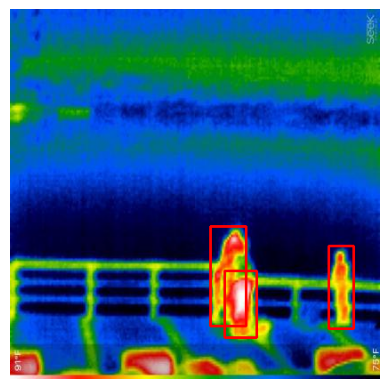

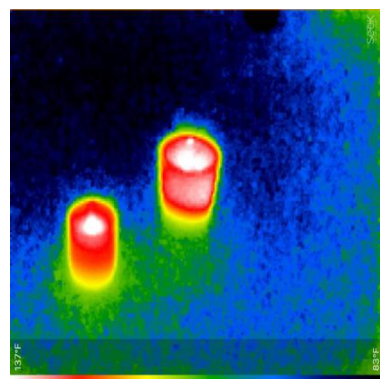

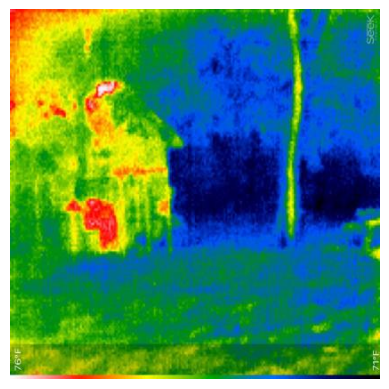

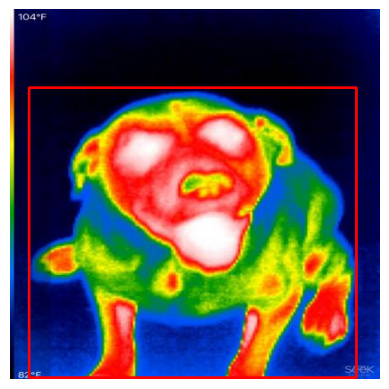

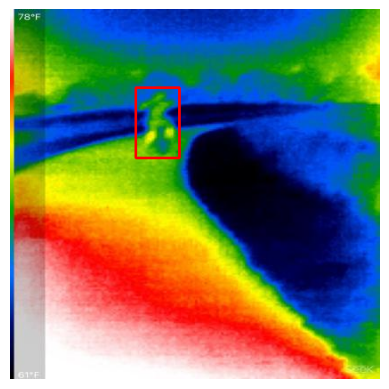

In [3]:
# Check number of images
print(f"Train Images: {len(train_images)}")
print(f"Valid Images: {len(valid_images)}")
print(f"Test Images: {len(test_images)}")

# Display a few images with annotations
def display_image_with_boxes(image_path, annotations):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, _ = img.shape
    
    for ann in annotations:
        class_id, x_center, y_center, bbox_width, bbox_height = map(float, ann.strip().split())
        x_center, y_center, bbox_width, bbox_height = int(x_center*width), int(y_center*height), int(bbox_width*width), int(bbox_height*height)
        x_min = int(x_center - bbox_width / 2)
        y_min = int(y_center - bbox_height / 2)
        x_max = int(x_center + bbox_width / 2)
        y_max = int(y_center + bbox_height / 2)
        
        # Draw rectangle
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Display first 5 images from the train set
for i in range(5):
    display_image_with_boxes(train_images[i], train_annotations[i])


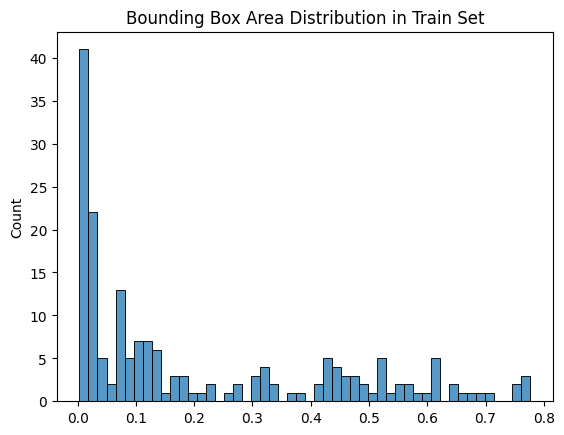

In [4]:
def analyze_annotations(annotations):
    class_ids = []
    bbox_areas = []
    for annotation in annotations:
        for ann in annotation:
            class_id, x_center, y_center, bbox_width, bbox_height = map(float, ann.strip().split())
            class_ids.append(class_id)
            bbox_areas.append(bbox_width * bbox_height)
    
    return class_ids, bbox_areas

# Analyzing train annotations
train_class_ids, train_bbox_areas = analyze_annotations(train_annotations)


# Plot bounding box area distribution
sns.histplot(train_bbox_areas, bins=50)
plt.title('Bounding Box Area Distribution in Train Set')
plt.show()


In [6]:
import os

# Define paths to the dataset
train_images_dir = r'C:\Users\ronga\OneDrive\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\train\images'
train_labels_dir = r'C:\Users\ronga\OneDrive\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\train\labels'

# List the number of files in the directory
print(f"Number of training images: {len(os.listdir(train_images_dir))}")
print(f"Number of training labels: {len(os.listdir(train_labels_dir))}")

# Display first 5 image and label file names
print("Sample image files:", os.listdir(train_images_dir)[:5])
print("Sample label files:", os.listdir(train_labels_dir)[:5])

Number of training images: 142
Number of training labels: 142
Sample image files: ['IMG_0001 2_jpg.rf.a64c70befa56fe10f85e72fee63c4c01.jpg', 'IMG_0001 4_jpg.rf.4602a05ba82cd5424af446c094c58f59.jpg', 'IMG_0001_jpg.rf.c609b93c832da7d81cd342c414c8fe35.jpg', 'IMG_0002 2_jpg.rf.b591a520d7e4532ea310fec86b8c3f02.jpg', 'IMG_0002 3_jpg.rf.5926b8d930f26a31af2f4e446163c016.jpg']
Sample label files: ['IMG_0001 2_jpg.rf.a64c70befa56fe10f85e72fee63c4c01.txt', 'IMG_0001 4_jpg.rf.4602a05ba82cd5424af446c094c58f59.txt', 'IMG_0001_jpg.rf.c609b93c832da7d81cd342c414c8fe35.txt', 'IMG_0002 2_jpg.rf.b591a520d7e4532ea310fec86b8c3f02.txt', 'IMG_0002 3_jpg.rf.5926b8d930f26a31af2f4e446163c016.txt']


Class distribution: Counter({1: 97, 0: 84})


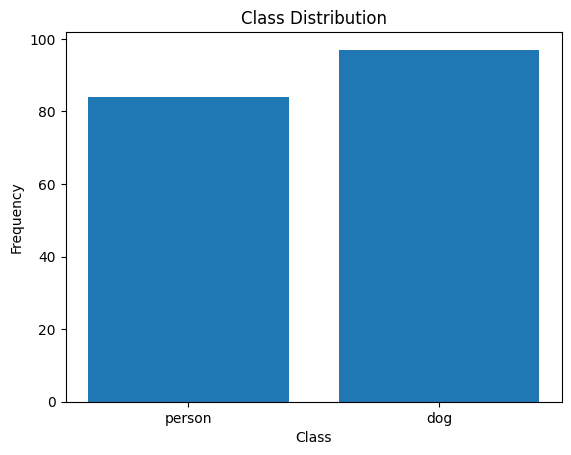

In [6]:
from collections import Counter

def count_classes(labels_dir):
    class_counts = Counter()
    
    for label_file in os.listdir(labels_dir):
        label_path = os.path.join(labels_dir, label_file)
        with open(label_path, 'r') as f:
            for line in f:
                class_id = int(line.split()[0])  # Assuming the first number is the class id
                class_counts[class_id] += 1
                
    return class_counts

# Count classes in the training set
class_counts = count_classes(train_labels_dir)
print("Class distribution:", class_counts)

# Visualize the class distribution
import matplotlib.pyplot as plt

plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(ticks=range(len(class_counts)), labels=['person', 'dog'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


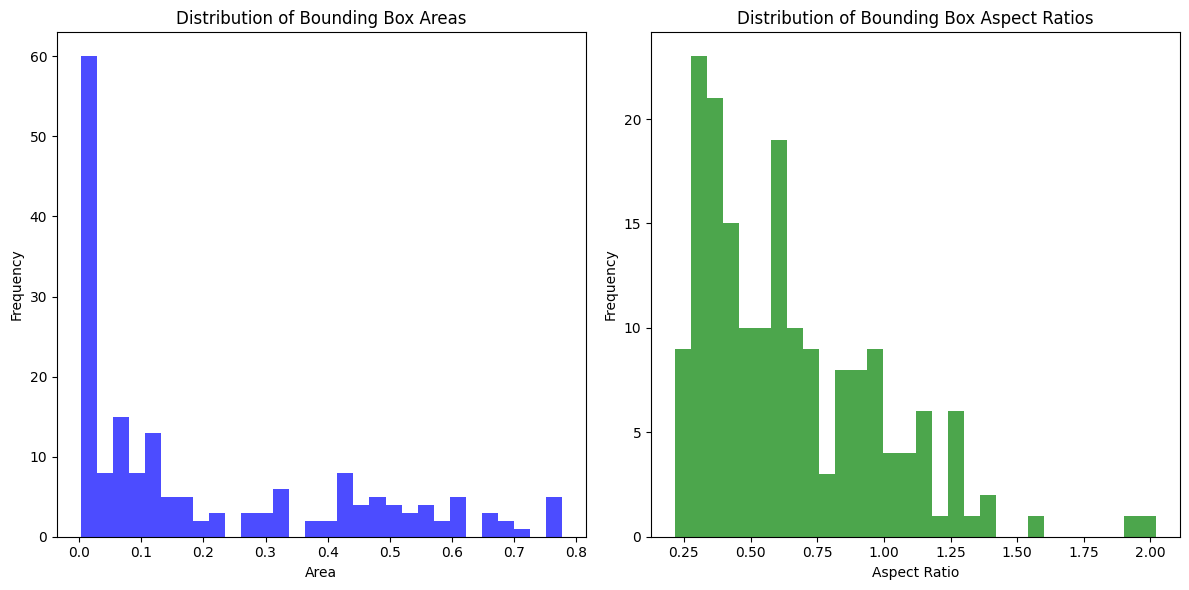

In [7]:
import matplotlib.pyplot as plt

def analyze_bounding_boxes(labels_dir):
    bbox_areas = []
    bbox_aspect_ratios = []

    for label_file in os.listdir(labels_dir):
        label_path = os.path.join(labels_dir, label_file)
        with open(label_path, 'r') as f:
            for line in f:
                _, x_center, y_center, bbox_width, bbox_height = map(float, line.split())
                area = bbox_width * bbox_height
                aspect_ratio = bbox_width / bbox_height
                bbox_areas.append(area)
                bbox_aspect_ratios.append(aspect_ratio)
    
    return bbox_areas, bbox_aspect_ratios

# Analyze bounding boxes in the training set
bbox_areas, bbox_aspect_ratios = analyze_bounding_boxes(train_labels_dir)

# Visualize bounding box areas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(bbox_areas, bins=30, color='blue', alpha=0.7)
plt.title("Distribution of Bounding Box Areas")
plt.xlabel("Area")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(bbox_aspect_ratios, bins=30, color='green', alpha=0.7)
plt.title("Distribution of Bounding Box Aspect Ratios")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [8]:
# Summary statistics for bounding box areas
bbox_areas_np = np.array(bbox_areas)
print(f"Average Bounding Box Area: {np.mean(bbox_areas_np)}")
print(f"Median Bounding Box Area: {np.median(bbox_areas_np)}")
print(f"Standard Deviation of Bounding Box Areas: {np.std(bbox_areas_np)}")

# Summary statistics for bounding box aspect ratios
bbox_aspect_ratios_np = np.array(bbox_aspect_ratios)
print(f"Average Bounding Box Aspect Ratio: {np.mean(bbox_aspect_ratios_np)}")
print(f"Median Bounding Box Aspect Ratio: {np.median(bbox_aspect_ratios_np)}")
print(f"Standard Deviation of Bounding Box Aspect Ratios: {np.std(bbox_aspect_ratios_np)}")


Average Bounding Box Area: 0.21012703676924305
Median Bounding Box Area: 0.10551497781065089
Standard Deviation of Bounding Box Areas: 0.22870718339343896
Average Bounding Box Aspect Ratio: 0.6462749565173028
Median Bounding Box Aspect Ratio: 0.587719298245614
Standard Deviation of Bounding Box Aspect Ratios: 0.3350132256658025


Detected Intensity Anomalies:
('IMG_0016_jpg.rf.f3040fdd34001f3abf681e286bf714de.jpg', 'Unusual Mean Intensity')
('IMG_0094_jpg.rf.03dbd175cdbd5379608debcc783a5361.jpg', 'Unusual Mean Intensity')
('IMG_0095_jpg.rf.f3cf643e95ab885a45db202209fbb86f.jpg', 'Unusual Mean Intensity')
('IMG_0096_jpg.rf.1ee95cc1c64f891e5037413225314247.jpg', 'Unusual Mean Intensity')
('IMG_0098_jpg.rf.5e8e3572da1c1aae4565bc705900131b.jpg', 'Unusual Mean Intensity')


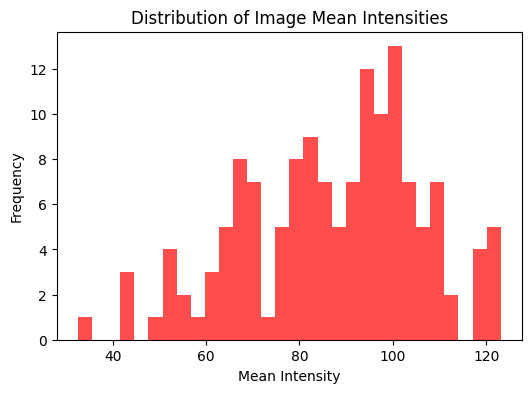

In [10]:
import cv2

# Function to detect image intensity anomalies
def detect_image_intensity_anomalies(image_dir):
    mean_intensities = []
    anomalies = []

    for image_file in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_file)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        if img is not None:
            mean_intensity = np.mean(img)
            mean_intensities.append(mean_intensity)
            
            # Detect anomalies: too dark or too bright images
            if mean_intensity < 50 or mean_intensity > 200:  # Adjust thresholds as needed
                anomalies.append((image_file, "Unusual Mean Intensity"))
        else:
            anomalies.append((image_file, "Image not found or corrupt"))

    return mean_intensities, anomalies

# Directory path to images
train_images_dir = r'C:\Users\ronga\OneDrive\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\train\images'

# Detect intensity anomalies in the training set
mean_intensities, intensity_anomalies = detect_image_intensity_anomalies(train_images_dir)

# Print detected anomalies
if intensity_anomalies:
    print("Detected Intensity Anomalies:")
    for anomaly in intensity_anomalies:
        print(anomaly)
else:
    print("No intensity anomalies detected.")

# Visualize image intensity distribution
plt.figure(figsize=(6, 4))
plt.hist(mean_intensities, bins=30, color='red', alpha=0.7)
plt.title("Distribution of Image Mean Intensities")
plt.xlabel("Mean Intensity")
plt.ylabel("Frequency")
plt.show()


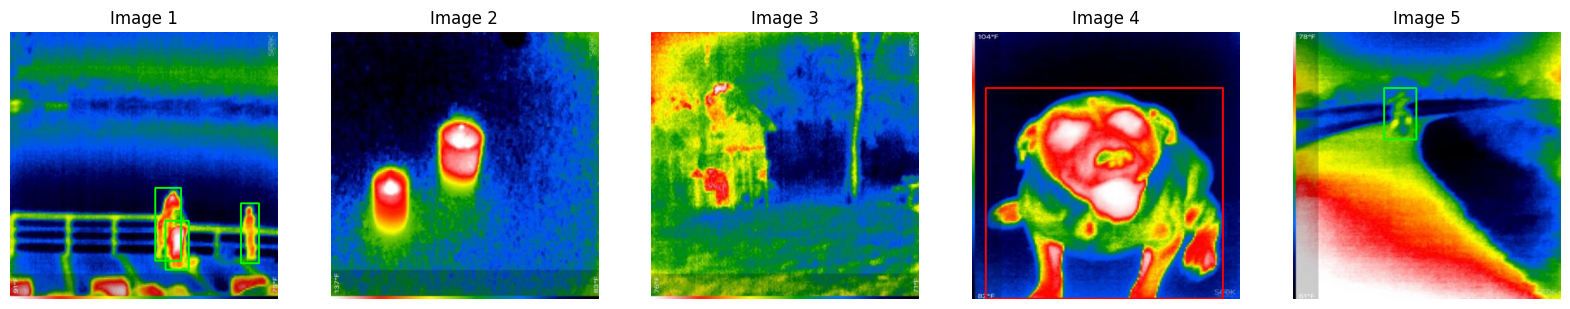

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compare bounding boxes across images
def compare_bounding_boxes_across_images(image_dir, labels_dir, num_images=5):
    image_files = os.listdir(image_dir)[:num_images]
    fig, axs = plt.subplots(1, num_images, figsize=(20, 5))
    
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(labels_dir, image_file.replace('.jpg', '.txt'))
        
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        height, width, _ = img.shape

        with open(label_path, 'r') as f:
            for line in f:
                class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.split())
                x_min = int((x_center - bbox_width / 2) * width)
                y_min = int((y_center - bbox_height / 2) * height)
                x_max = int((x_center + bbox_width / 2) * width)
                y_max = int((y_center + bbox_height / 2) * height)

                # Draw bounding box
                color = (255, 0, 0) if class_id == 0 else (0, 255, 0)  # Blue for person, Green for dog
                cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, 2)

        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(f"Image {i+1}")
    
    plt.show()

# Compare bounding boxes in the first 5 images of the training set
train_images_dir = r'C:\Users\ronga\OneDrive\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\train\images'
train_labels_dir = r'C:\Users\ronga\OneDrive\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\train\labels'

compare_bounding_boxes_across_images(train_images_dir, train_labels_dir, num_images=5)


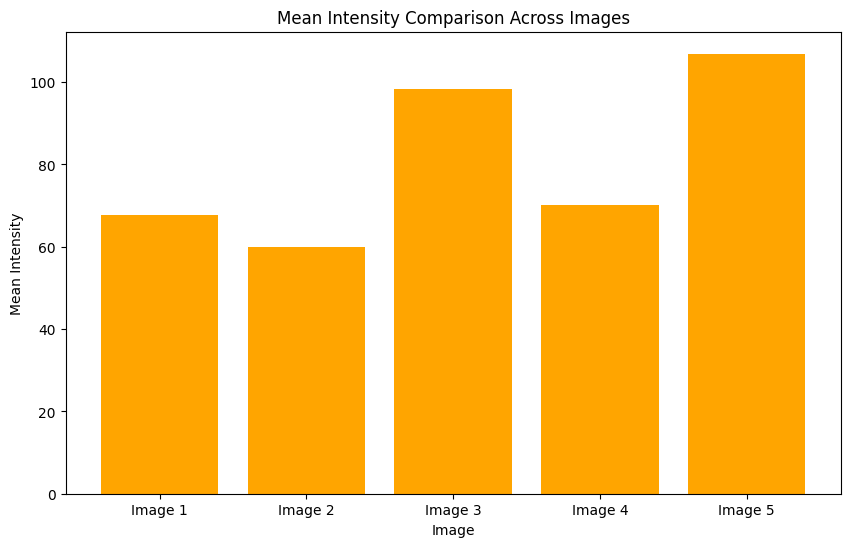

In [12]:
# Function to compare image intensity across images
def compare_image_intensity_across_images(image_dir, num_images=5):
    image_files = os.listdir(image_dir)[:num_images]
    mean_intensities = []

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        if img is not None:
            mean_intensity = np.mean(img)
            mean_intensities.append(mean_intensity)
        else:
            mean_intensities.append(None)
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, num_images + 1), mean_intensities, color='orange')
    plt.xticks(range(1, num_images + 1), [f"Image {i+1}" for i in range(num_images)])
    plt.xlabel('Image')
    plt.ylabel('Mean Intensity')
    plt.title('Mean Intensity Comparison Across Images')
    plt.show()

# Compare image intensity in the first 5 images of the training set
compare_image_intensity_across_images(train_images_dir, num_images=5)


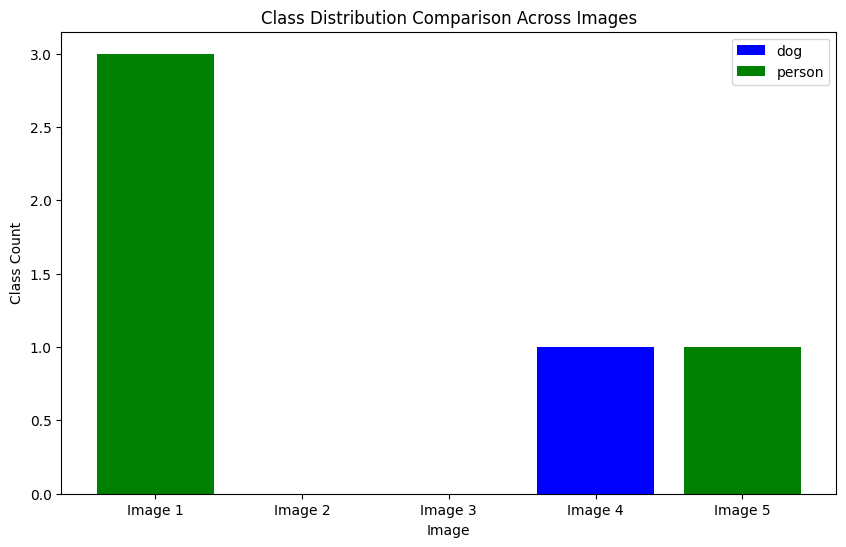

In [13]:
# Function to compare class distribution across images
def compare_class_distribution_across_images(labels_dir, num_images=5):
    image_files = os.listdir(labels_dir)[:num_images]
    class_distributions = []

    for label_file in image_files:
        label_path = os.path.join(labels_dir, label_file)
        class_counts = [0, 0]  # Assuming 2 classes: person and dog
        
        with open(label_path, 'r') as f:
            for line in f:
                class_id = int(line.split()[0])
                class_counts[class_id] += 1

        class_distributions.append(class_counts)
    
    class_distributions = np.array(class_distributions).T
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(range(1, num_images + 1), class_distributions[0], label='dog', color='blue')
    ax.bar(range(1, num_images + 1), class_distributions[1], bottom=class_distributions[0], label='person', color='green')
    
    ax.set_xlabel('Image')
    ax.set_ylabel('Class Count')
    ax.set_xticks(range(1, num_images + 1))
    ax.set_xticklabels([f"Image {i+1}" for i in range(num_images)])
    ax.set_title('Class Distribution Comparison Across Images')
    ax.legend()
    plt.show()

# Compare class distribution in the first 5 images of the training set
compare_class_distribution_across_images(train_labels_dir, num_images=5)


In [14]:
!pip install scikit-image



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\ronga\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


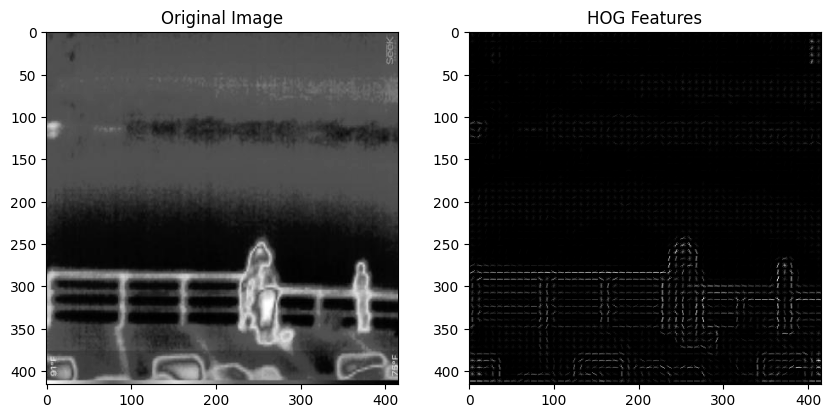

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog

# Function to extract HOG features
def extract_hog_features(image):
    hog_features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
                                  visualize=True, block_norm='L2-Hys')
    return hog_features, hog_image

# Load a sample image
image_path = os.path.join(train_images_dir, os.listdir(train_images_dir)[0])
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Extract HOG features and visualize
hog_features, hog_image = extract_hog_features(image)

# Display HOG Image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Features")
plt.show()


In [16]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i5-11400H 2.70GHz)
Setup complete  (12 CPUs, 15.6 GB RAM, 169.5/476.0 GB disk)


**Using imgaug for Data Augmentation**

In [17]:
pip install imgaug

Note: you may need to restart the kernel to use updated packages.


**Augmentation Pipeline**

We will create an augmentation pipeline using imgaug to apply transformations like flips, rotations, scaling, and brightness changes. These augmentations will increase the diversity of dataset and help prevent overfitting in model.


In [19]:
import numpy as np

# List all NumPy dtypes
all_dtypes = [np.dtype(dt) for dt in np.sctypeDict.values() if isinstance(dt, str)]
print(all_dtypes)

import imgaug.augmenters as iaa
import cv2
import os
import matplotlib.pyplot as plt

# Define the augmentation pipeline
augmentation_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip 50% of images horizontally
    iaa.Flipud(0.2),  # Flip 20% of images vertically
    iaa.Affine(rotate=(-20, 20)),  # Rotate images by -20 to +20 degrees
    iaa.Multiply((0.8, 1.2)),  # Change brightness (between 80% and 120%)
    iaa.GaussianBlur(sigma=(0, 1.0))  # Apply Gaussian blur with a sigma between 0 and 1.0
])


[]


AttributeError: `np.sctypes` was removed in the NumPy 2.0 release. Access dtypes explicitly instead.

**Appling Augmentation to the Dataset**

Now, we will load images from folder, apply the augmentation pipeline, and save or display the augmented images and lables .

In [18]:
import imgaug.augmenters as iaa
import cv2
import os
import numpy as np
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

# Define paths for your images and labels
image_folder = r'C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\train\images'
label_folder = r'C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\train\labels'
augmented_image_folder = r'C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\augumented\images'
augmented_label_folder = r'C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\augumented\labels'

# Create folders for augmented images and labels if they don’t exist
os.makedirs(augmented_image_folder, exist_ok=True)
os.makedirs(augmented_label_folder, exist_ok=True)

# Define your augmentation pipeline
augmentation_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip 50% of images horizontally
    iaa.Affine(rotate=(-20, 20)),  # Rotate images by -20 to +20 degrees
    iaa.Multiply((0.8, 1.2)),  # Change brightness (between 80% and 120%)
    iaa.GaussianBlur(sigma=(0, 1.0))  # Apply Gaussian blur with a sigma between 0 and 1.0
])

# Function to read bounding boxes from YOLO format
def read_yolo_labels(label_file, img_width, img_height):
    bbs = []
    with open(label_file, 'r') as f:
        for line in f.readlines():
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            # Convert normalized coordinates to actual pixel coordinates
            x_center *= img_width
            y_center *= img_height
            width *= img_width
            height *= img_height
            # Create bounding box object
            x1 = x_center - width / 2
            y1 = y_center - height / 2
            x2 = x_center + width / 2
            y2 = y_center + height / 2
            bbs.append(BoundingBox(x1, y1, x2, y2, label=int(class_id)))
    return BoundingBoxesOnImage(bbs, shape=(img_height, img_width))

# Function to write bounding boxes back to YOLO format
def write_yolo_labels(bbs, label_file, img_width, img_height):
    with open(label_file, 'w') as f:
        for bb in bbs.bounding_boxes:
            x_center = (bb.x1 + bb.x2) / 2 / img_width
            y_center = (bb.y1 + bb.y2) / 2 / img_height
            width = (bb.x2 - bb.x1) / img_width
            height = (bb.y2 - bb.y1) / img_height
            # Write to label file in YOLO format
            f.write(f"{bb.label} {x_center} {y_center} {width} {height}\n")

# Loop through images and apply augmentations
for image_file in os.listdir(image_folder):
    # Load the image
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
    img_height, img_width = image.shape[:2]

    # Load the corresponding label file
    label_file = os.path.join(label_folder, os.path.splitext(image_file)[0] + '.txt')
    bbs = read_yolo_labels(label_file, img_width, img_height)

    # Apply augmentations to the image and bounding boxes
    for i in range(5):  # Generate 5 augmented versions of each image
        aug_image, aug_bbs = augmentation_pipeline(image=image, bounding_boxes=bbs)

        # Clip bounding boxes that might have gone out of the image
        aug_bbs = aug_bbs.remove_out_of_image().clip_out_of_image()

        # Save the augmented image
        augmented_image_path = os.path.join(augmented_image_folder, f"{os.path.splitext(image_file)[0]}_aug_{i}.jpg")
        cv2.imwrite(augmented_image_path, aug_image)

        # Save the corresponding augmented label file
        augmented_label_path = os.path.join(augmented_label_folder, f"{os.path.splitext(image_file)[0]}_aug_{i}.txt")
        write_yolo_labels(aug_bbs, augmented_label_path, img_width, img_height)


## FEATURE ENGINEERING

In [ ]:
import cv2
import matplotlib.pyplot as plt

import os
import numpy as np
from skimage import feature
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


In [20]:
image_folder = r'C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\augumented\images'
label_folder = r'C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\augumented\labels'


image_files = os.listdir(image_folder)

 **Feature Extraction** : Edge Detection, HOG, and LBP

In [21]:
def extract_features(image):
    # Resize image to fixed size for HOG and LBP
    resized_image = cv2.resize(image, (128, 128))

    # 1. Apply Canny Edge Detection
    edges = cv2.Canny(resized_image, threshold1=100, threshold2=200)

    # 2. Apply Local Binary Pattern (LBP)
    lbp = feature.local_binary_pattern(resized_image, P=8, R=1, method='uniform')

    # 3. Apply Histogram of Oriented Gradients (HOG)
    hog_features, _ = feature.hog(resized_image, visualize=True)

    # Flatten features and combine them into one feature vector
    combined_features = np.hstack((edges.flatten(), lbp.flatten(), hog_features))
    
    return combined_features


**Load Images, Extract Features, and Store Labels**

In [22]:
features_list = []
labels_list = []

for image_file in image_files:
    # Load the image
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Extract features
    features = extract_features(image)
    features_list.append(features)

    # Load the corresponding label
    label_file = os.path.splitext(image_file)[0] + '.txt'  # Adjust to your label format
    label_path = os.path.join(label_folder, label_file)

    # Check if the label file exists and load the labels
    if os.path.exists(label_path):
        with open(label_path, 'r') as label_file:
            label_data = label_file.readlines()
            label_objects = []
            for line in label_data:
                parts = line.strip().split()
                class_id = int(parts[0])
                bbox = list(map(float, parts[1:]))  # Bounding box values
                label_objects.append([class_id] + bbox)  # Store class_id and bbox together
            labels_list.append(label_objects)  # Append list of objects in the image
    else:
        print(f'No label found for {image_file}')
        labels_list.append([])  # Append empty list if no labels exist


**Convert Features and Labels into Numpy Arrays**

In [23]:
# Convert lists to numpy arrays for further processing
X = np.array(features_list)  # Features
y = np.array(labels_list, dtype=object)    # Labels (object type to handle variable length lists)


**Feature Selection**: Dimensionality Reduction using PCA

In [24]:
# Check the number of samples (n_samples) and features (n_features)
n_samples, n_features = X.shape

# Set n_components to the smaller value between n_samples and n_features
n_components = min(n_samples, n_features, 100)  # You can adjust 100 to any value based on preference

# Apply PCA to reduce dimensionality
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

print(f"Reduced feature shape: {X_pca.shape}")



Reduced feature shape: (710, 100)


**Here’s what each part of the shape indicates**:

710: This is the number of samples or instances in  dataset (rows).
100: This is the number of features or attributes for each instance (columns).
The goal here is to reduce the number of features (dimensionality) in the dataset to make it more manageable for modeling, while retaining as much variance (information) as possible. This helps improve computational efficiency and can also mitigate issues related to the curse of dimensionality.

In [28]:
print(X_train.shape, y_train.shape)


(497, 100) (497,)


**Train a Random Forest for Feature Importance**

In [29]:
# Verify y_flat labels
print("y_flat:", y_flat)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_flat, test_size=0.3, random_state=42)

# Verify shapes of the training data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Train a RandomForest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_
print("Feature Importances:", importances)

# Sort and select important features
indices = np.argsort(importances)[::-1]
print("Top Feature Indices:", indices[:50])

important_features = X_train[:, indices[:50]]  # Select top 50 important features
print("Important Features Shape:", important_features.shape)


y_flat: [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 

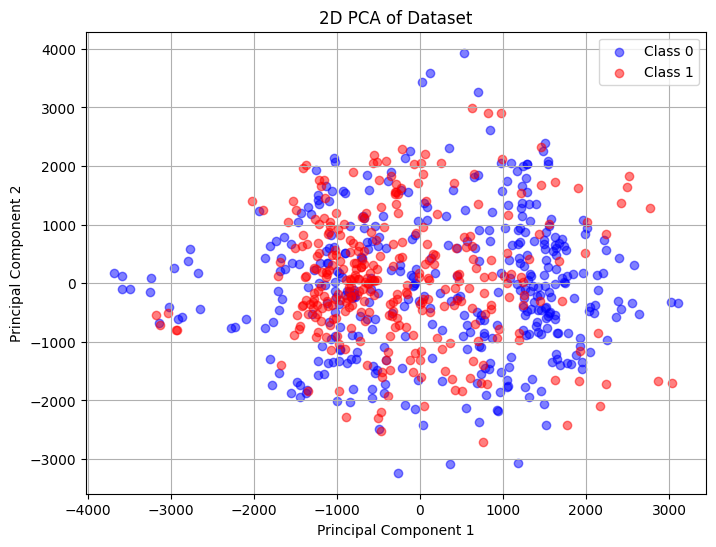

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'X' and 'y_flat' are the original dataset and labels respectively

# Reducing the dataset to 2 principal components for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# Plotting the 2D PCA results with different colors for each class
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[y_flat == 0, 0], X_pca_2d[y_flat == 0, 1], color='blue', label='Class 0', alpha=0.5)
plt.scatter(X_pca_2d[y_flat == 1, 0], X_pca_2d[y_flat == 1, 1], color='red', label='Class 1', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Dataset')
plt.legend()
plt.grid(True)
plt.show()


**Recursive Feature Elimination (RFE)**

In [26]:
# Apply RFE to select the top features
rfe = RFE(estimator=clf, n_features_to_select=50)
rfe.fit(X_train, y_train)

# Transform training and test sets based on RFE-selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

print(f"RFE-selected feature shape: {X_train_rfe.shape}")


RFE-selected feature shape: (497, 50)


The output RFE-selected feature shape: (497, 50) means that RFE has successfully selected 15 important features from the dataset and  training set now contains 467 samples with 50 selected features each.



**Proceeding with Model Training Using Selected Features**

Now that RFE has selected the most important features, we can proceed to train your machine learning model (such as Random Forest) using the reduced feature set (X_train_rfe and X_test_rfe).

In [31]:
# Train the RandomForest Classifier using the RFE-selected features
clf_rfe = RandomForestClassifier()
clf_rfe.fit(X_train_rfe, y_train)

# Evaluate the model
train_accuracy = clf_rfe.score(X_train_rfe, y_train)
test_accuracy = clf_rfe.score(X_test_rfe, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 1.0
Test Accuracy: 0.7699530516431925



**The results you're seeing indicate that your model is overfitting**:

Training Accuracy: 1.0: The model is perfectly fitting the training data.
Test Accuracy: 0.76: The model is not generalizing well to unseen data, leading to poor performance on the test set.
This is a classic case of overfitting, where the model learns the noise and specific patterns of the training data but fails to generalize to new data. 

We will be applying some strategies to reduce overfitting and improve generalization:

**Regularization**

Adding Regularization to the Random Forest: weu can use hyperparameters to reduce overfitting in Random Forest. Key parameters include:
max_depth: Limit the maximum depth of each tree. Shallower trees generalize better.
min_samples_split and min_samples_leaf: Increasing the minimum number of samples required to split an internal node or be at a leaf node. This prevents the trees from becoming too specifie

In [32]:
clf_rfe = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=4, random_state=42)
clf_rfe.fit(X_train_rfe, y_train)

train_accuracy = clf_rfe.score(X_train_rfe, y_train)
test_accuracy = clf_rfe.score(X_test_rfe, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 1.0
Test Accuracy: 0.7417840375586855


In [33]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf_rfe, X_train_rfe, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores)}")


Cross-Validation Scores: [       0.78         0.8     0.75758     0.74747     0.75758]
Mean Cross-Validation Score: 0.7685252525252526


**Hyperparameter Tuning**

we further improve model performance by tuning hyperparameters using GridSearchCV or RandomizedSearchCV.

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf_rfe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_rfe, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

# Train with the best parameters
best_clf = grid_search.best_estimator_
best_train_accuracy = best_clf.score(X_train_rfe, y_train)
best_test_accuracy = best_clf.score(X_test_rfe, y_test)

print(f"Best Training Accuracy: {best_train_accuracy}")
print(f"Best Test Accuracy: {best_test_accuracy}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Training Accuracy: 1.0
Best Test Accuracy: 0.7652582159624414


**Reduce Overfitting by Reducing Feature Complexity** 

We further reduce the number of features used in the model by increasing the regularization or applying additional feature selection techniques.

Fewer features with RFE by adjusting n_features_to_select to a lower value and checking performance.

**Increase Dataset Size (if possible)**

If  dataset is small, the model might overfit due to insufficient data.


**Considering Simpler Models**

Sometimes, simpler models (like logistic regression, decision trees with depth limits) might generalize better than complex ones like Random Forest.

In [35]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model for comparison
clf_logreg = LogisticRegression()
clf_logreg.fit(X_train_rfe, y_train)

train_accuracy_logreg = clf_logreg.score(X_train_rfe, y_train)
test_accuracy_logreg = clf_logreg.score(X_test_rfe, y_test)

print(f"Logistic Regression Training Accuracy: {train_accuracy_logreg}")
print(f"Logistic Regression Test Accuracy: {test_accuracy_logreg}")


Logistic Regression Training Accuracy: 0.8048289738430584
Logistic Regression Test Accuracy: 0.704225352112676


# PERFORMING YOLO 

In [19]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.2.86  Python-3.12.0 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i9-11900H 2.50GHz)
Setup complete  (16 CPUs, 15.7 GB RAM, 251.5/475.5 GB disk)


In [20]:
from ultralytics import YOLO

# Load the YOLOv8 model (nano version)
model = YOLO("yolov8n.yaml")  # This will load the configuration for YOLOv8 nano (use "yolov8n.pt" for pre-trained weights)

# Use the model to train on your dataset with the provided data.yaml file
results = model.train(
    data=r"C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\data.yaml", 
    epochs=10
)

# Optional: print the training results summary
print(results)


New https://pypi.org/project/ultralytics/8.3.32 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.86  Python-3.12.0 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i9-11900H 2.50GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnost

train: Scanning C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\augumented\labels... 710 images, 55 backgrounds, 0 corrupt: 100%|██████████| 710/710 [00:01<00:00, 543.07it/s]

train: New cache created: C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\augumented\labels.cache



val: Scanning C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\valid\labels... 41 images, 5 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<00:00, 831.12it/s]

val: New cache created: C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\valid\labels.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.823      4.447      4.227          7        640: 100%|██████████| 45/45 [04:03<00:00,  5.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.21s/it]

                   all         41         49    0.00206      0.374    0.00252    0.00112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      2.524      3.807      3.643          7        640: 100%|██████████| 45/45 [04:14<00:00,  5.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.86s/it]

                   all         41         49    0.00221      0.378    0.00396    0.00145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      2.302      3.297      3.244          7        640: 100%|██████████| 45/45 [04:07<00:00,  5.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.91s/it]

                   all         41         49      0.256      0.216      0.201     0.0481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      2.141       2.89      3.019         10        640: 100%|██████████| 45/45 [04:09<00:00,  5.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.00s/it]

                   all         41         49      0.671      0.227      0.293      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      2.045      2.645      2.903          7        640: 100%|██████████| 45/45 [04:06<00:00,  5.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.86s/it]

                   all         41         49      0.274      0.258      0.202     0.0687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.951      2.417      2.812          9        640: 100%|██████████| 45/45 [04:06<00:00,  5.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.95s/it]

                   all         41         49      0.525      0.264      0.305      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.853      2.217      2.699          6        640: 100%|██████████| 45/45 [04:09<00:00,  5.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.81s/it]

                   all         41         49      0.554      0.448      0.509      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.832      2.111      2.683          9        640: 100%|██████████| 45/45 [03:59<00:00,  5.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.74s/it]

                   all         41         49      0.673      0.444      0.556      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G       1.76      1.931      2.584          7        640: 100%|██████████| 45/45 [04:08<00:00,  5.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.79s/it]

                   all         41         49      0.831       0.59      0.735      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.727      1.826      2.548          6        640: 100%|██████████| 45/45 [04:07<00:00,  5.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.79s/it]

                   all         41         49      0.646      0.596      0.631      0.258



10 epochs completed in 0.706 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.2.86  Python-3.12.0 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i9-11900H 2.50GHz)
YOLOv8n summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.46s/it]


                   all         41         49      0.834       0.59      0.735      0.281
                   dog         22         22      0.795      0.773      0.799      0.331
                person         19         27      0.873      0.407      0.671      0.232
Speed: 4.7ms preprocess, 105.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000022FE59E8E30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019

In [21]:
!yolo task=detect mode=train model=yolov8s.pt data="C:/Users/Faiz Hussain/Desktop/Thermal Dogs and People.v1-resize-416x416.yolov8/data.yaml" epochs=10 plots=True


New https://pypi.org/project/ultralytics/8.3.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.86 🚀 Python-3.12.0 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i9-11900H 2.50GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/Faiz Hussain/Desktop/Thermal Dogs and People.v1-resize-416x416.yolov8/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnos


  0%|          | 0.00/21.5M [00:00<?, ?B/s]
  1%|          | 128k/21.5M [00:00<00:29, 756kB/s]
  1%|          | 256k/21.5M [00:00<00:59, 373kB/s]
  2%|▏         | 384k/21.5M [00:00<00:57, 386kB/s]
  2%|▏         | 512k/21.5M [00:01<00:51, 429kB/s]
  3%|▎         | 640k/21.5M [00:01<00:47, 464kB/s]
  3%|▎         | 768k/21.5M [00:01<00:37, 582kB/s]
  5%|▍         | 1.00M/21.5M [00:01<00:27, 785kB/s]
  5%|▌         | 1.12M/21.5M [00:02<00:30, 699kB/s]
  6%|▌         | 1.25M/21.5M [00:02<00:32, 646kB/s]
  7%|▋         | 1.50M/21.5M [00:02<00:27, 774kB/s]
  8%|▊         | 1.62M/21.5M [00:02<00:27, 757kB/s]
  9%|▊         | 1.88M/21.5M [00:02<00:20, 987kB/s]
  9%|▉         | 2.00M/21.5M [00:03<00:24, 822kB/s]
 11%|█         | 2.38M/21.5M [00:03<00:16, 1.23MB/s]
 12%|█▏        | 2.62M/21.5M [00:03<00:15, 1.30MB/s]
 13%|█▎        | 2.88M/21.5M [00:03<00:21, 906kB/s] 
 14%|█▍        | 3.00M/21.5M [00:04<00:20, 952kB/s]
 15%|█▌        | 3.25M/21.5M [00:04<00:18, 1.02MB/s]
 16%|█▌        | 3.38

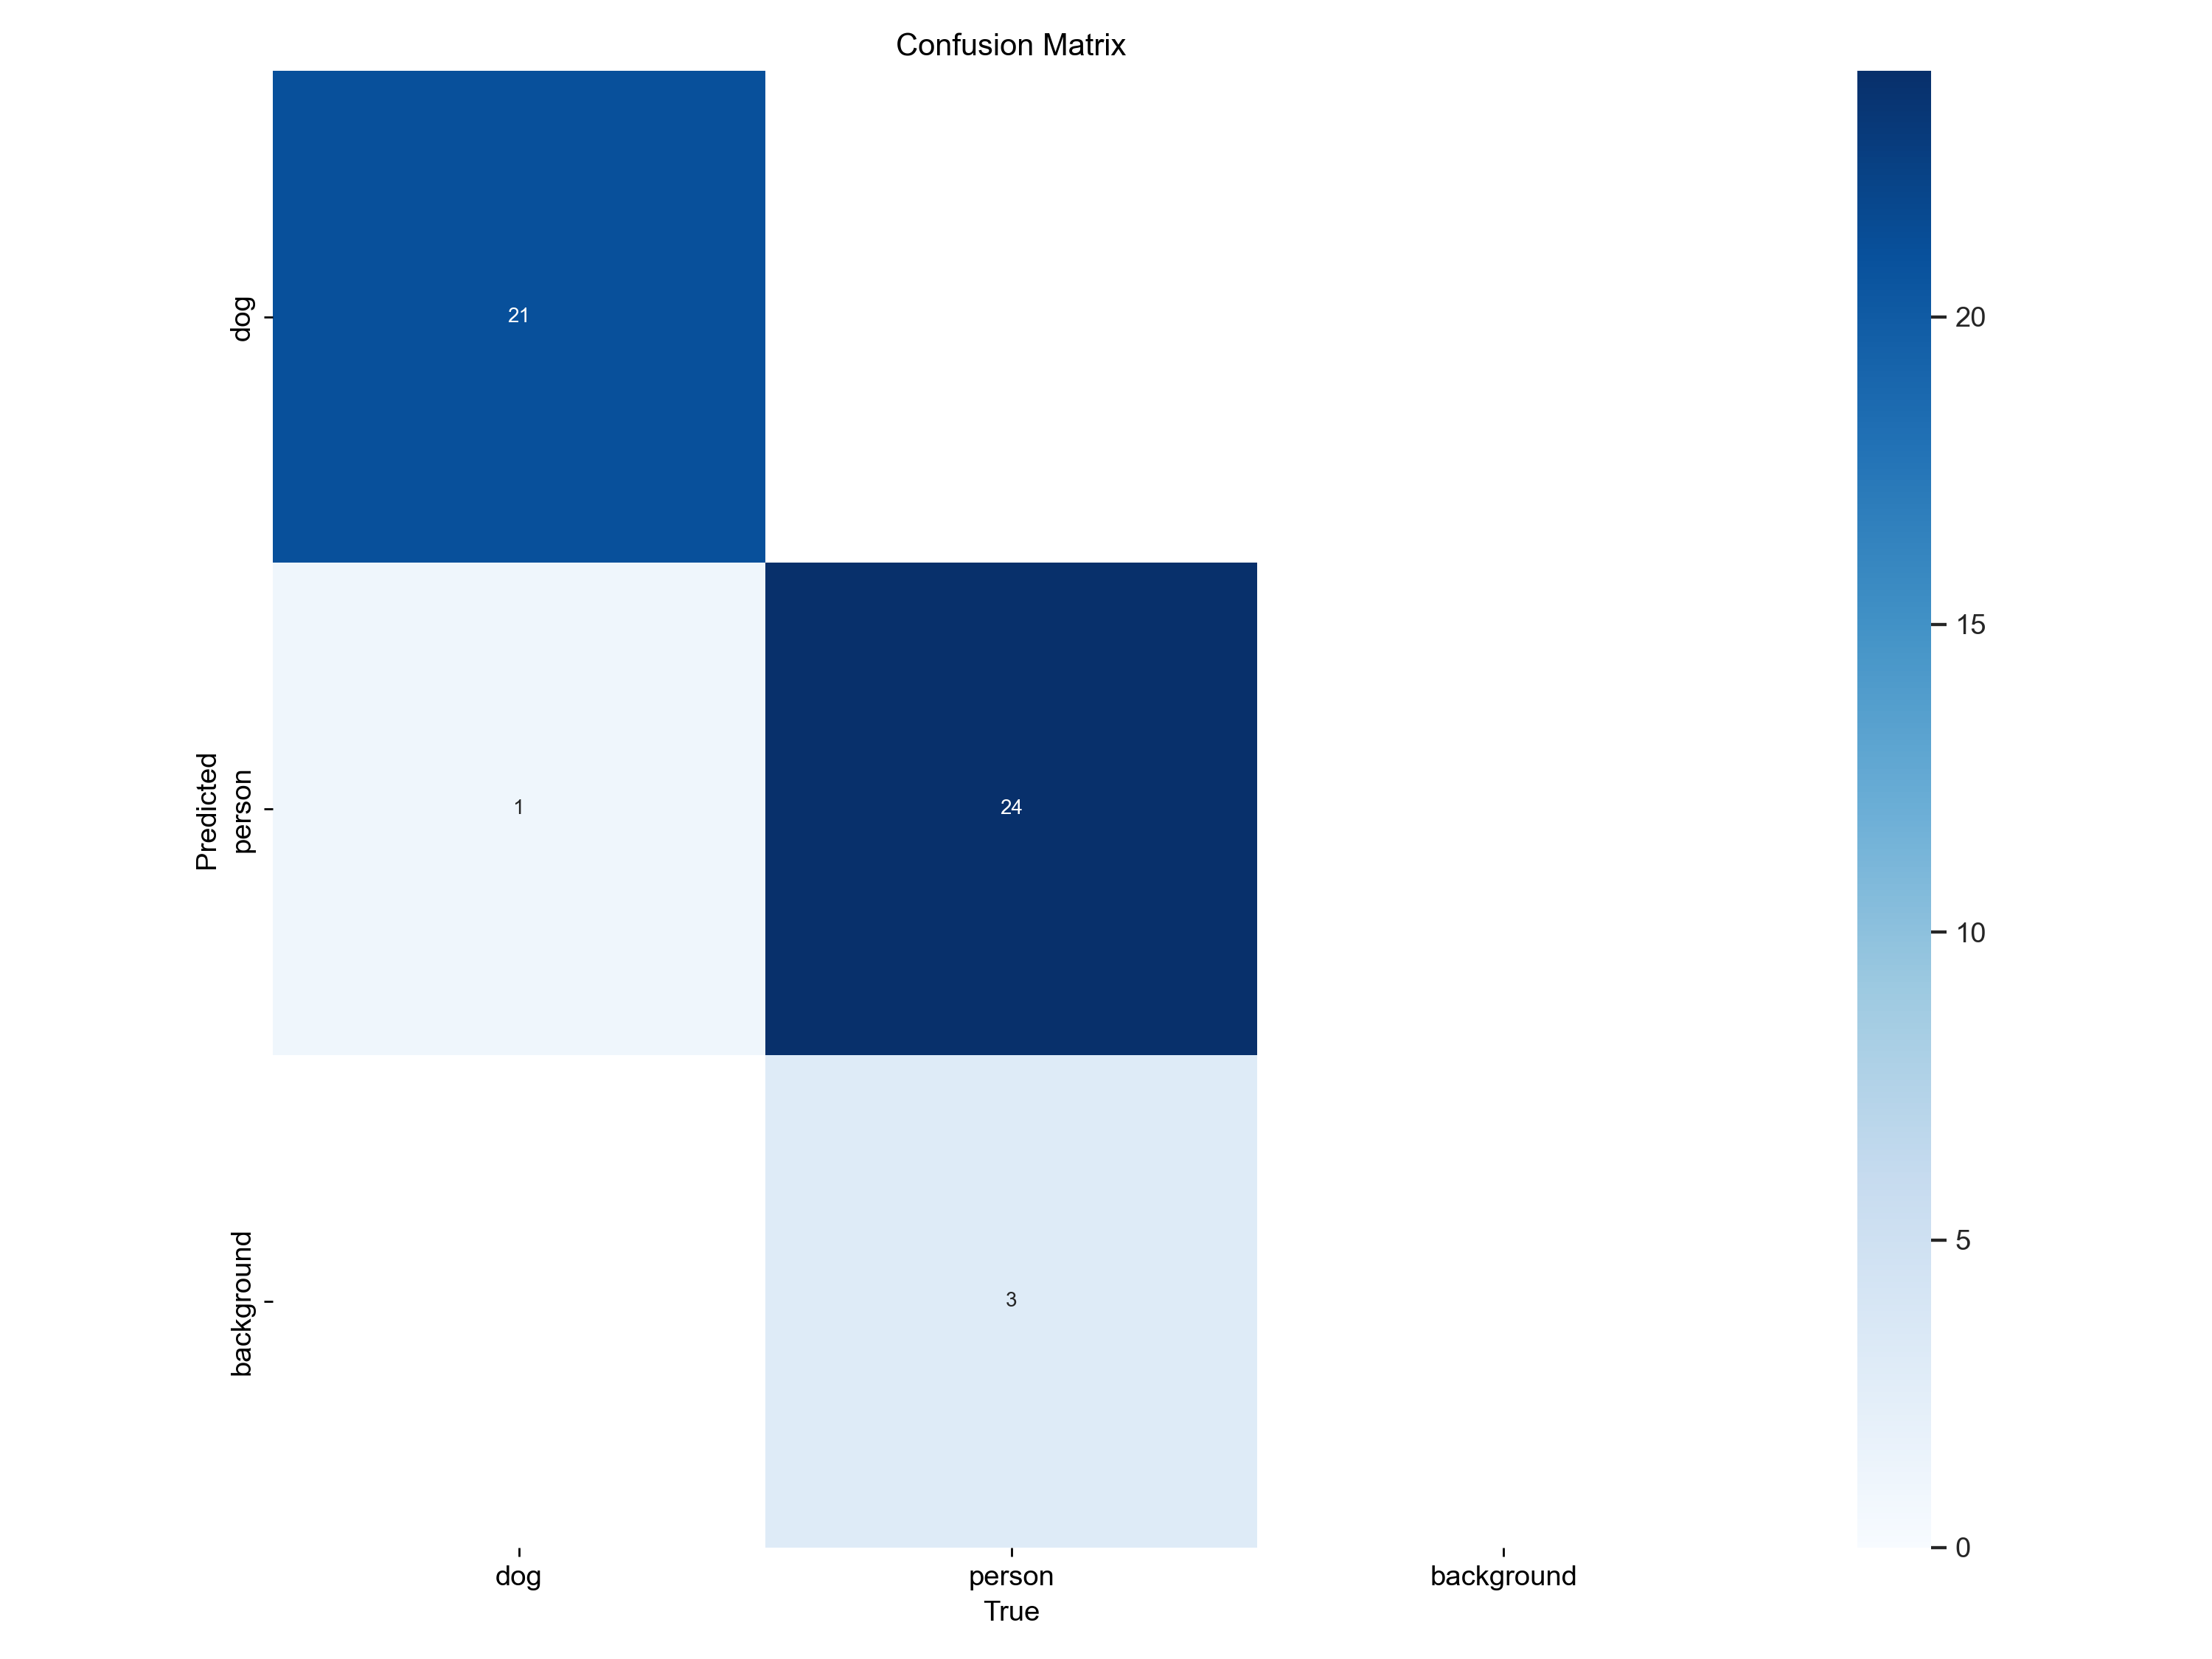

In [22]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

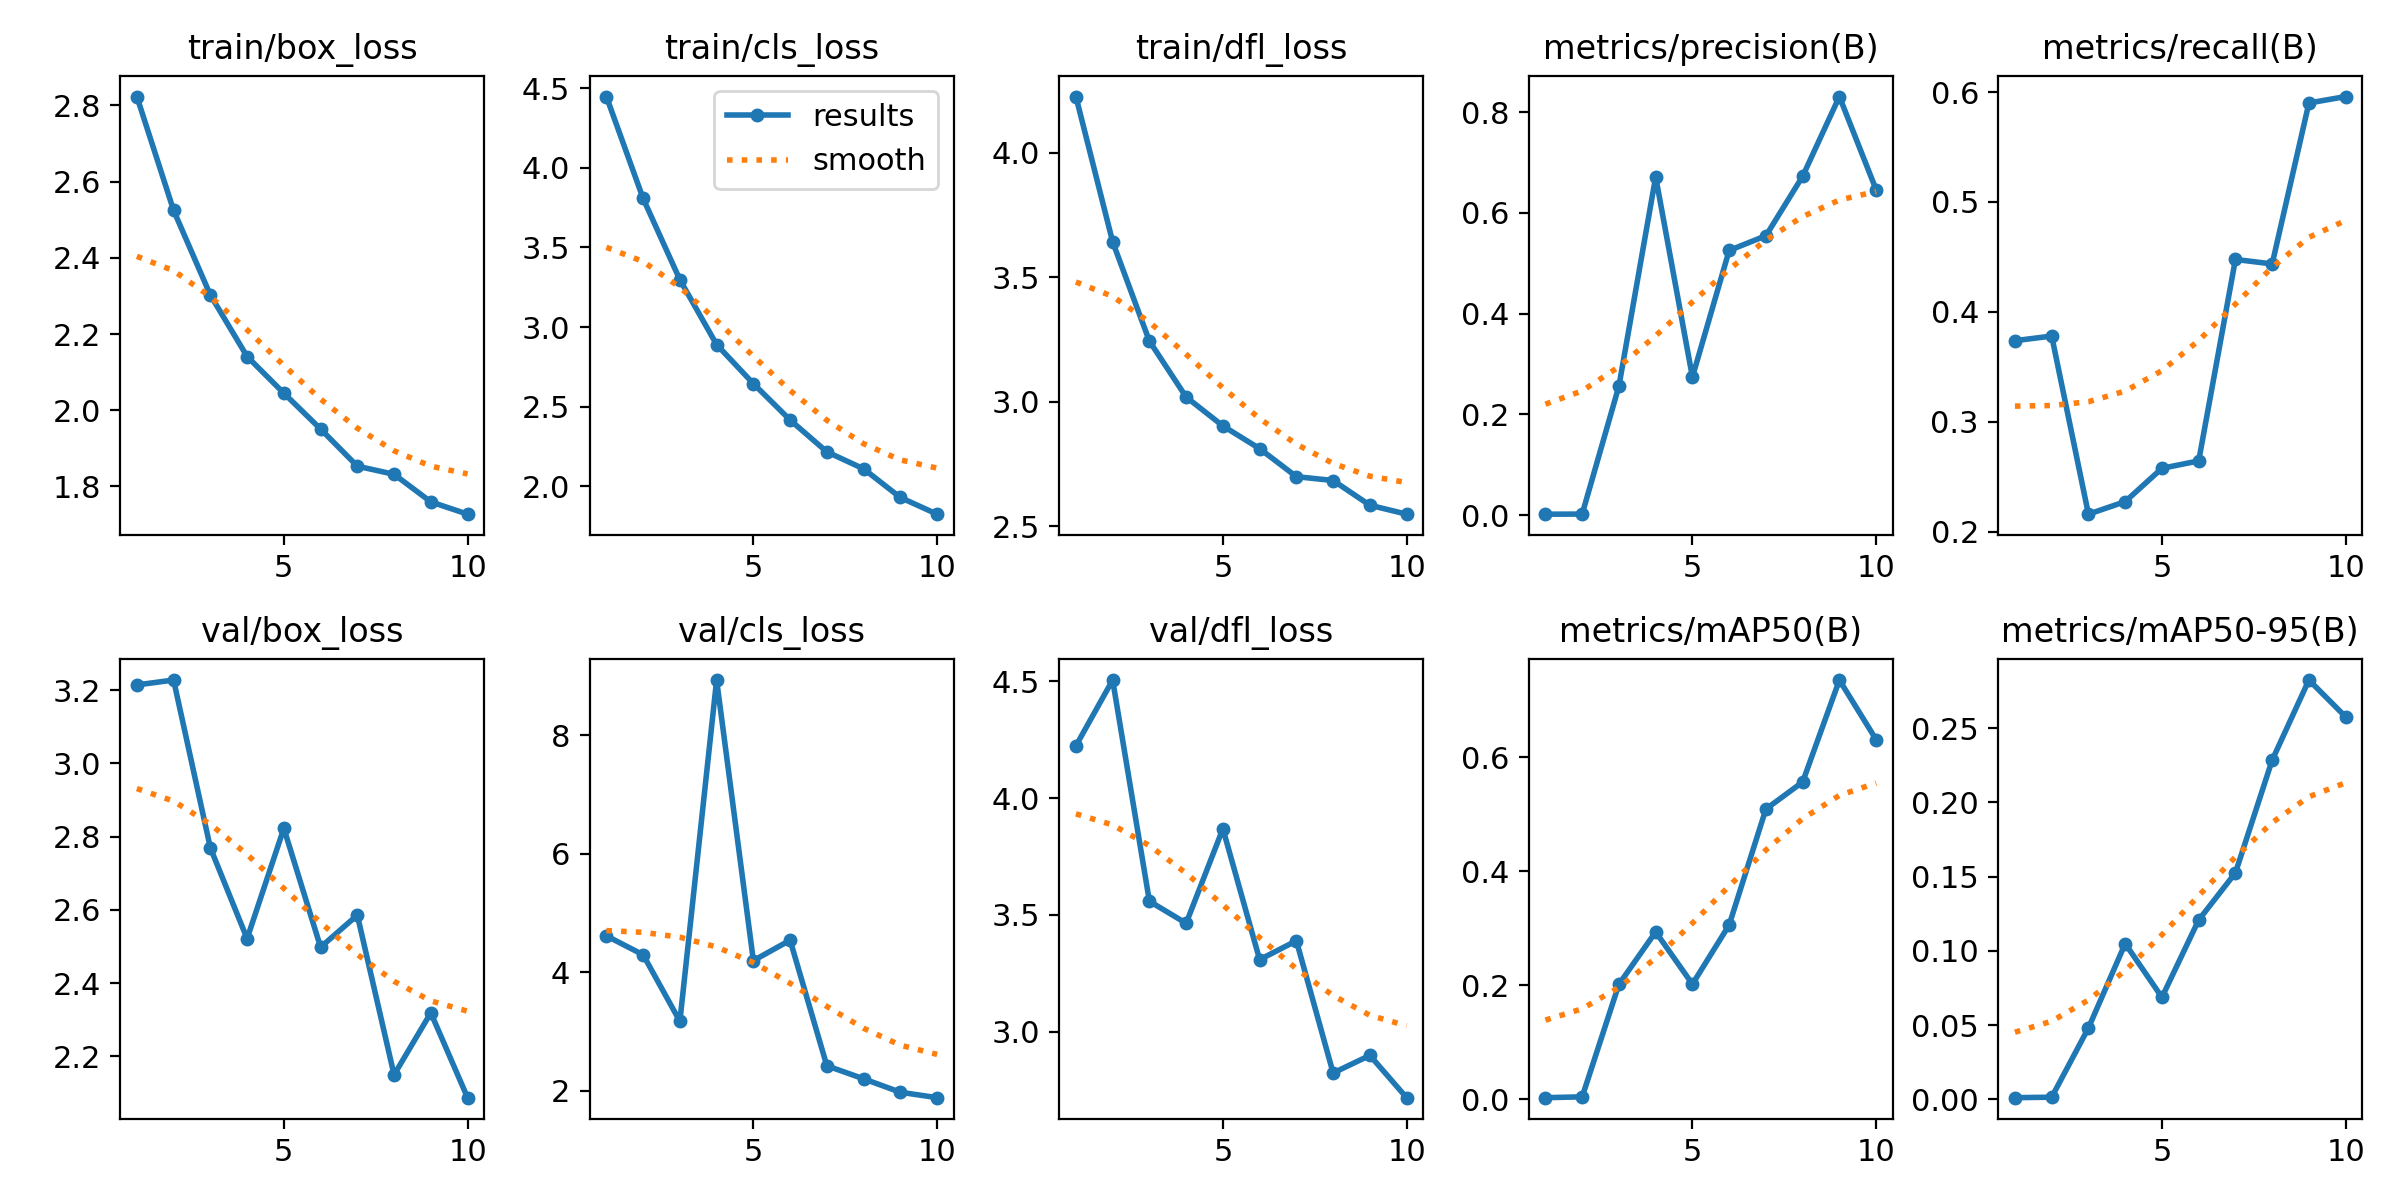

In [31]:
Image(filename='runs/detect/train/results.png', width=600)

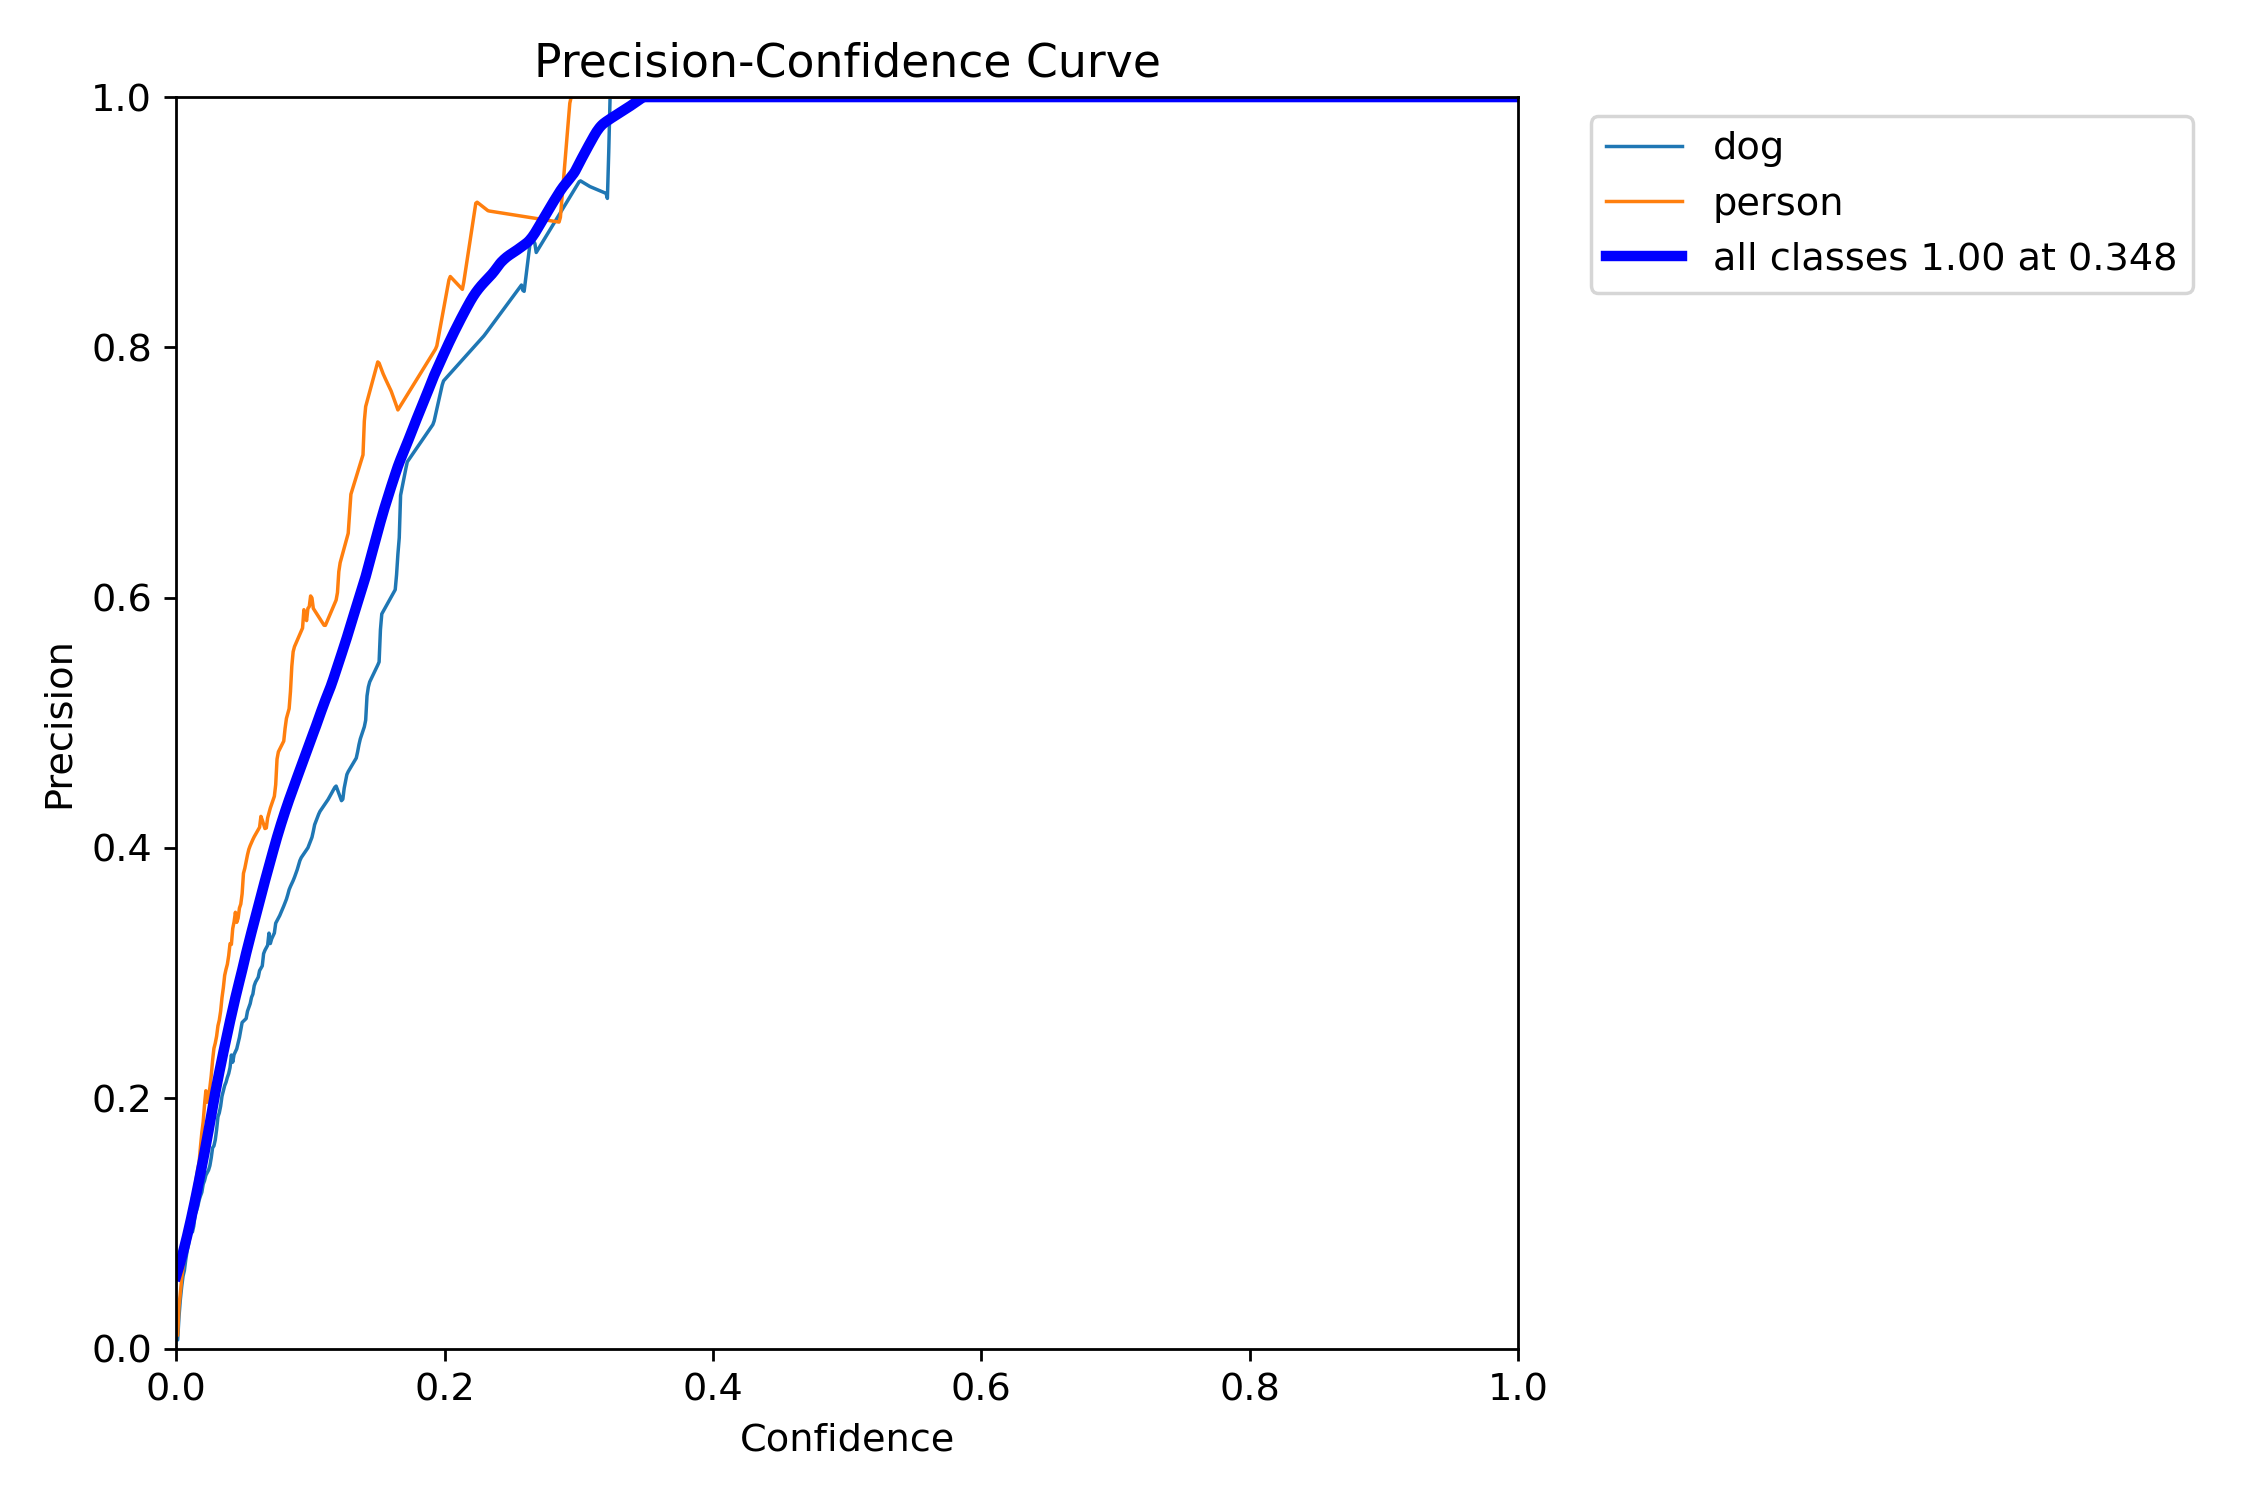

In [33]:
Image(filename='runs/detect/train/P_curve.png', width=600)

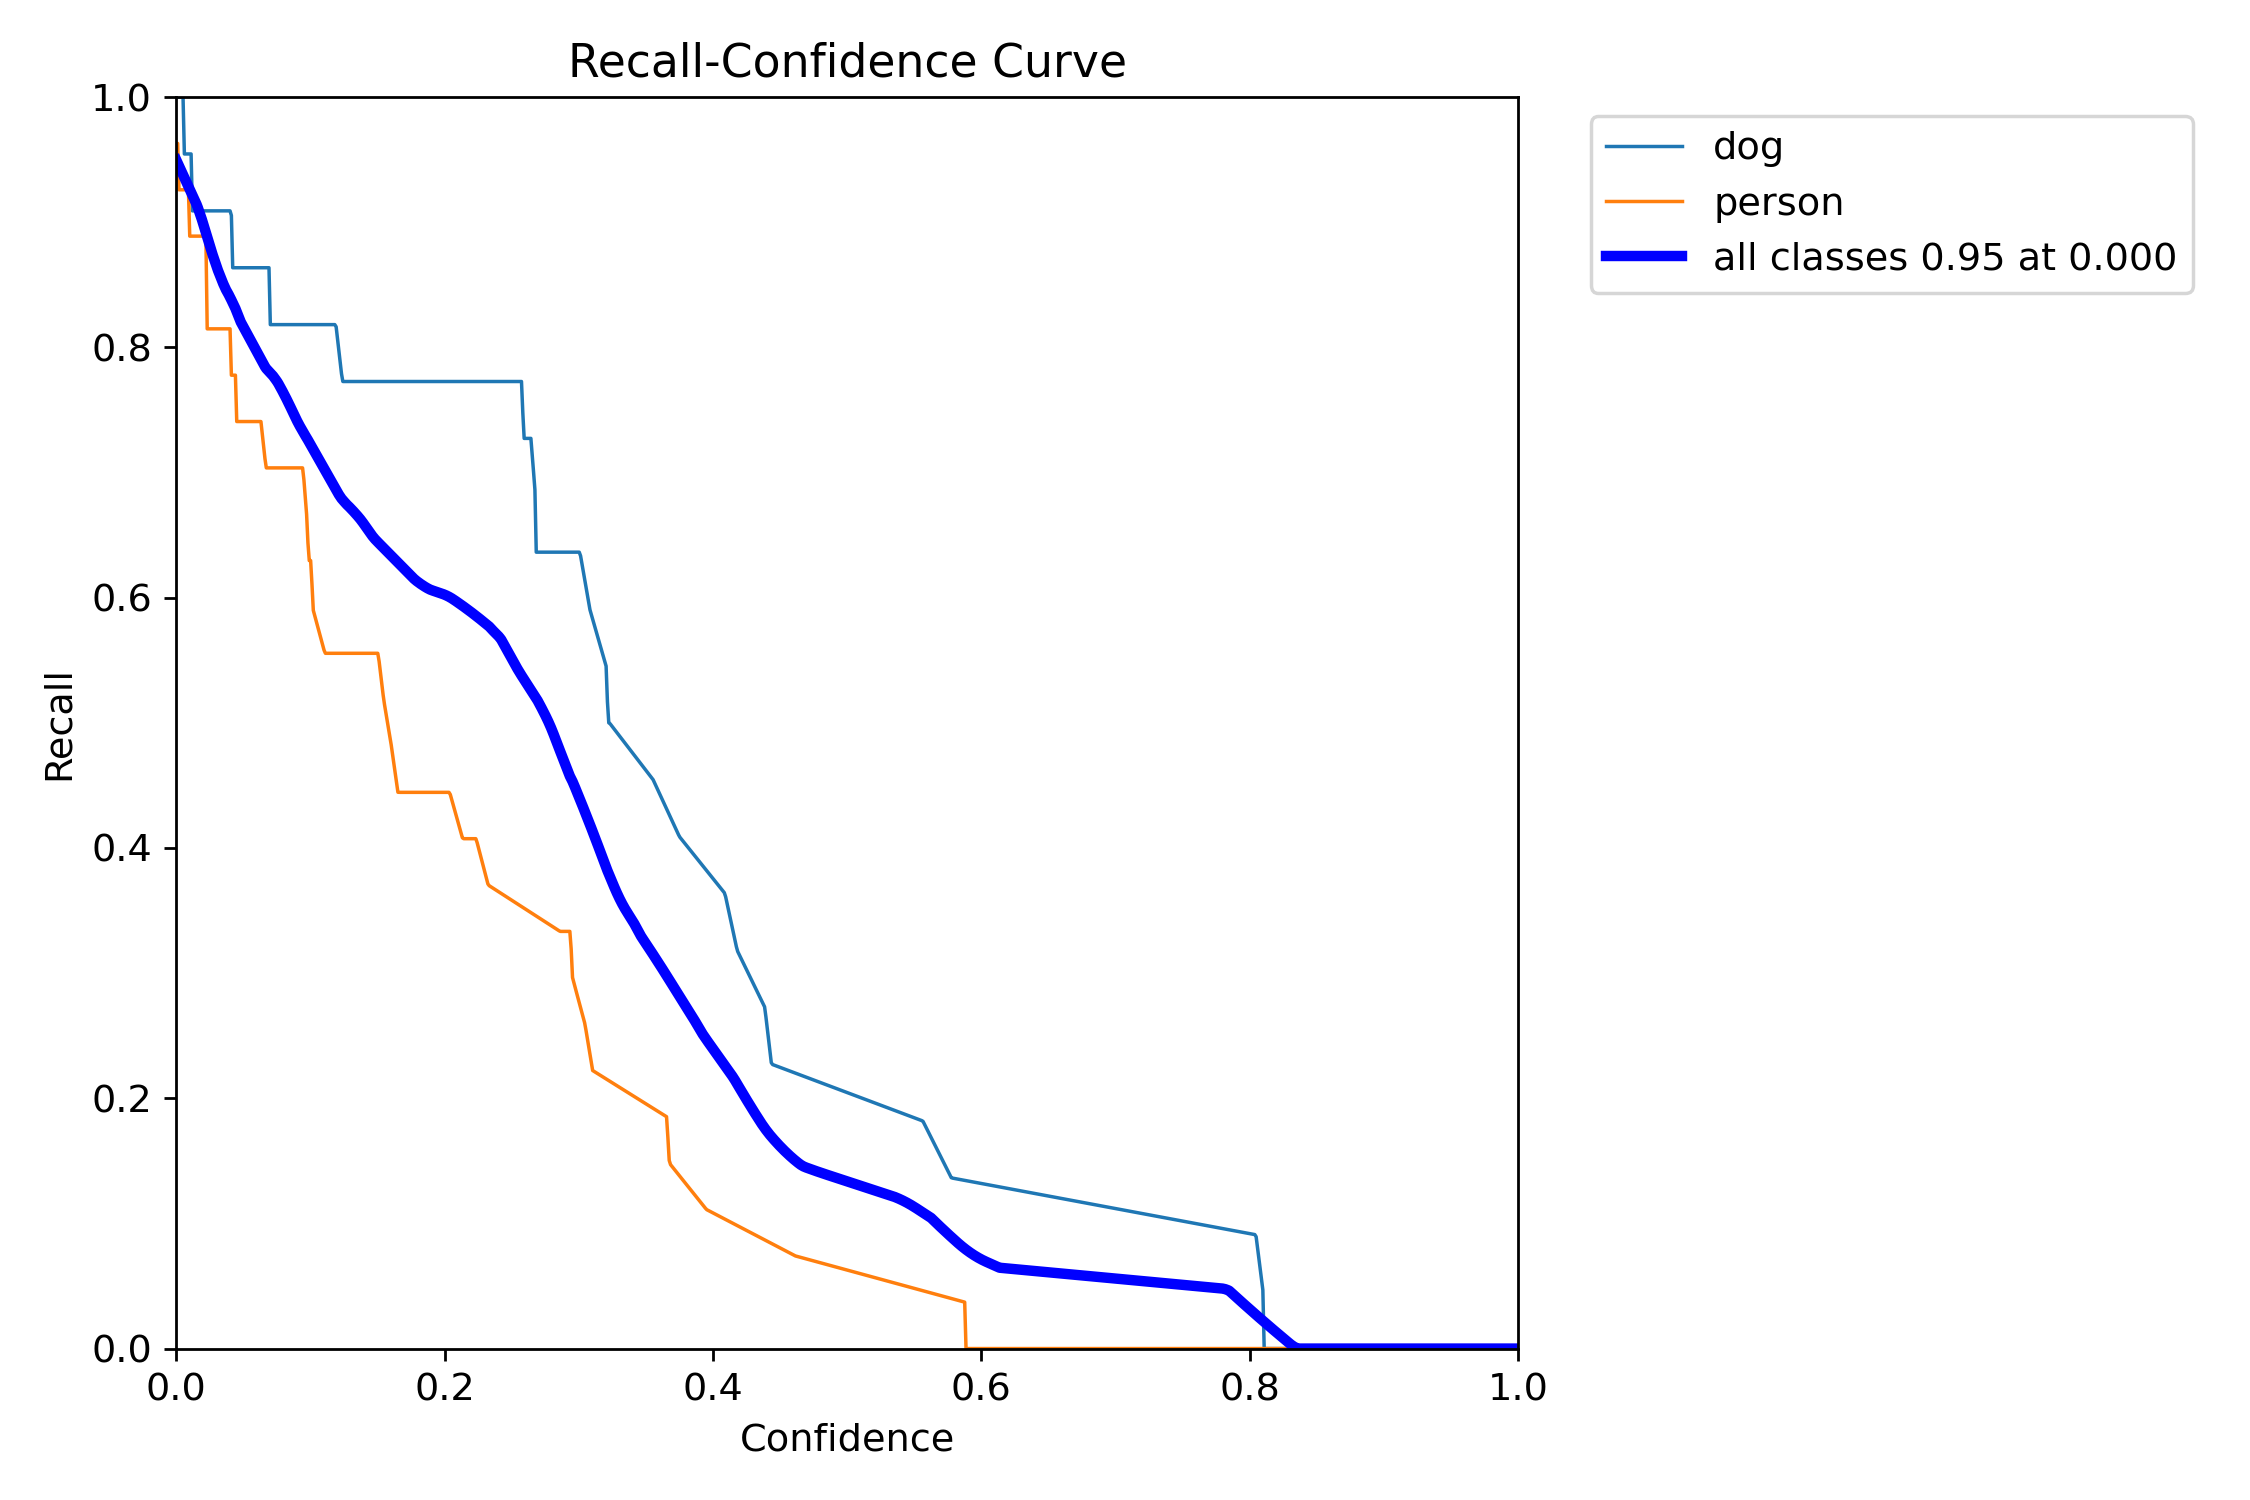

In [35]:
Image(filename='runs/detect/train/R_curve.png', width=600)

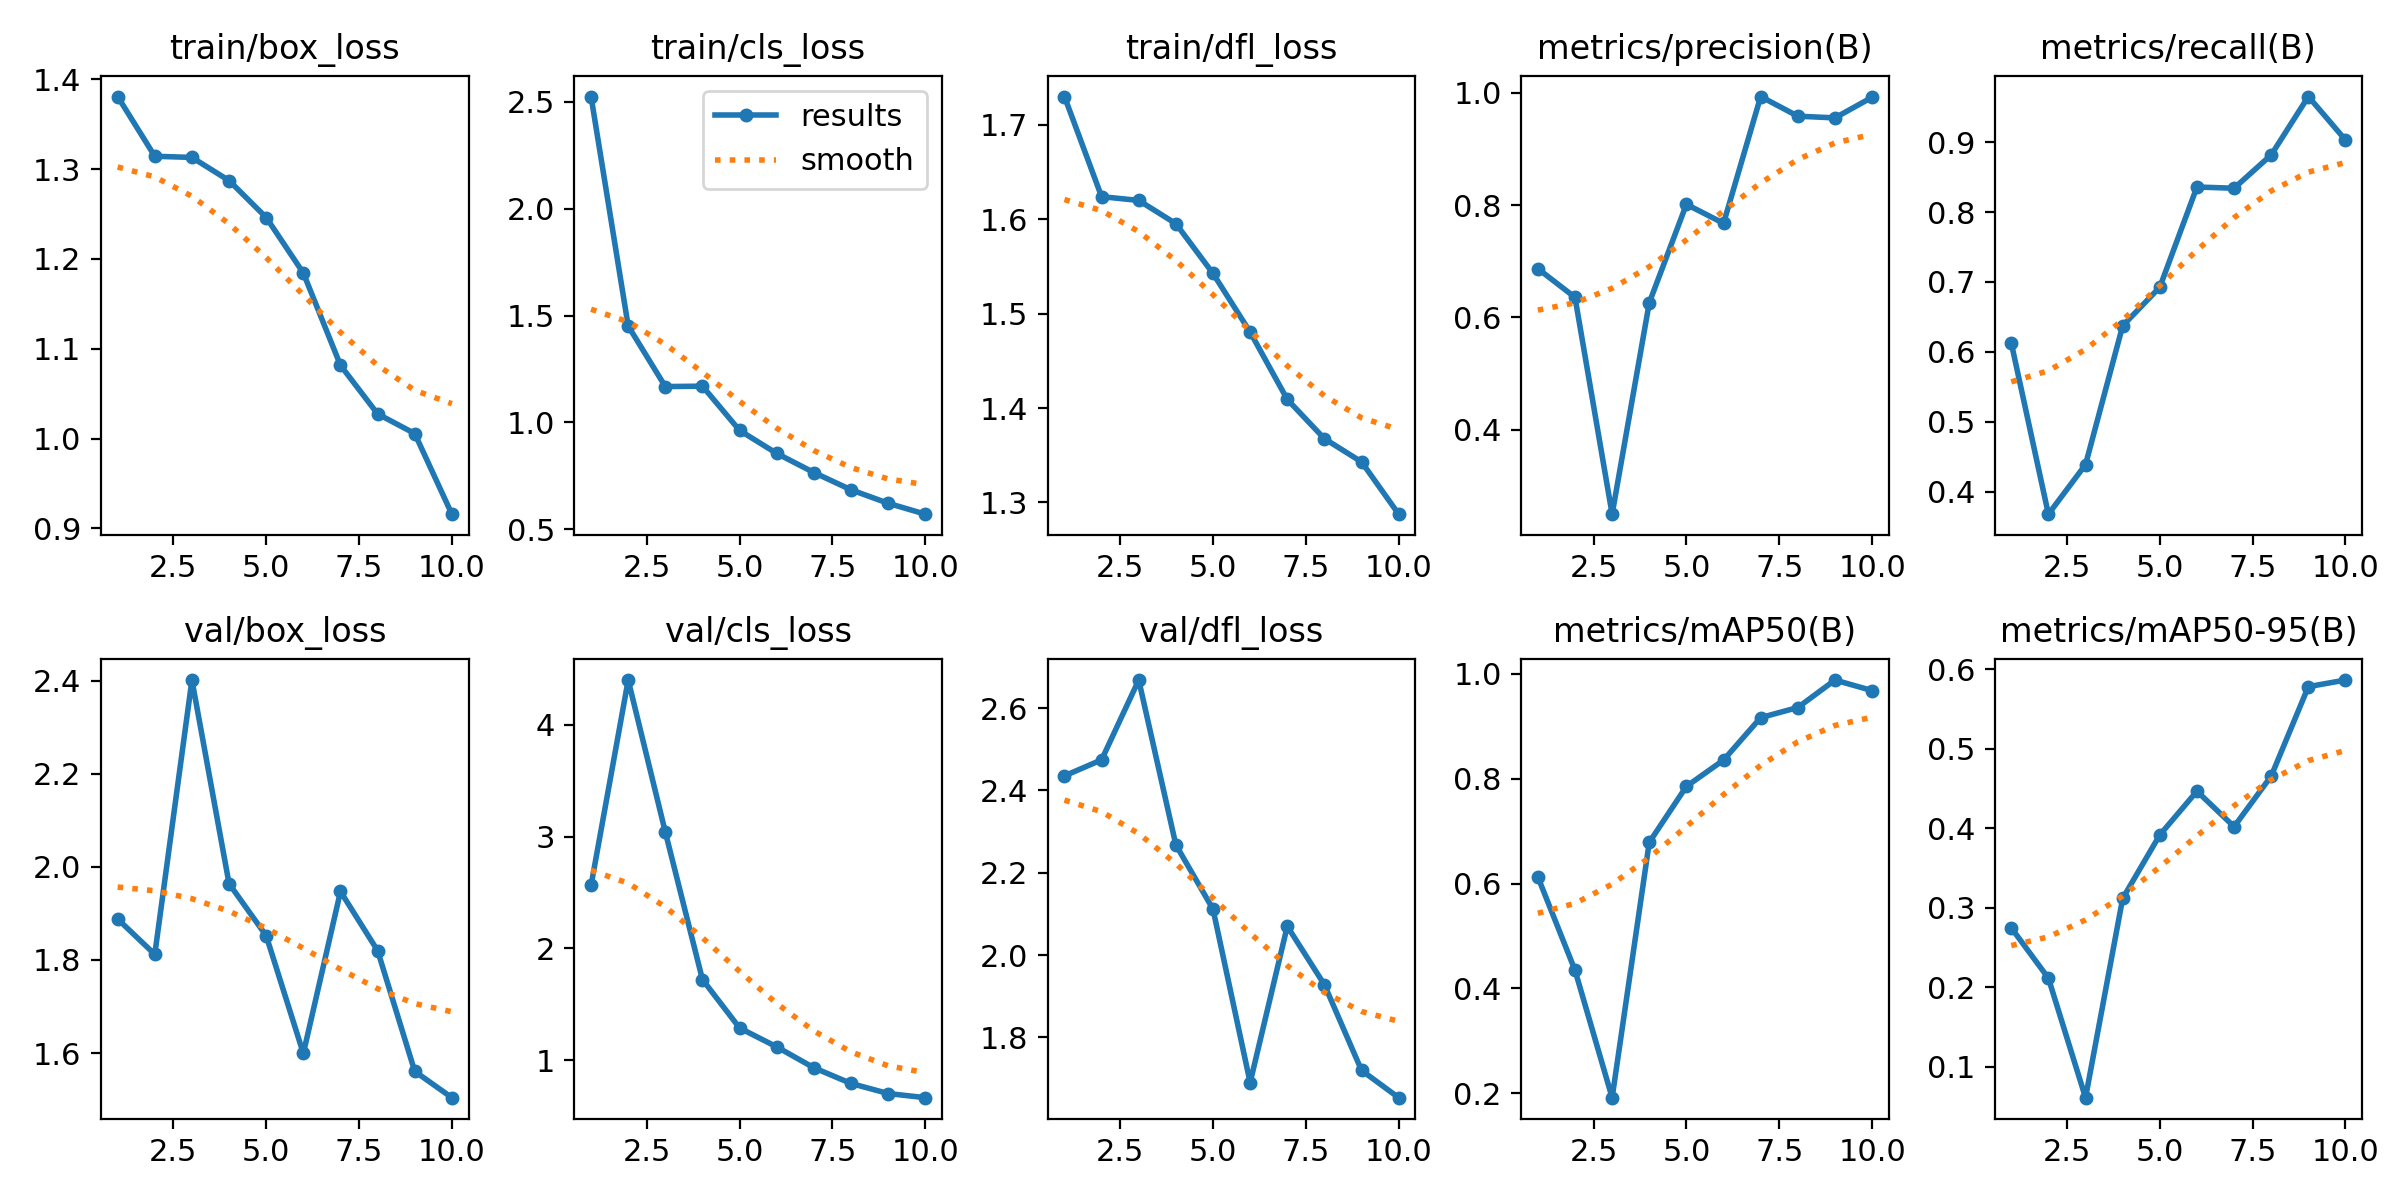

In [32]:
Image(filename='runs/detect/train2/results.png', width=600)

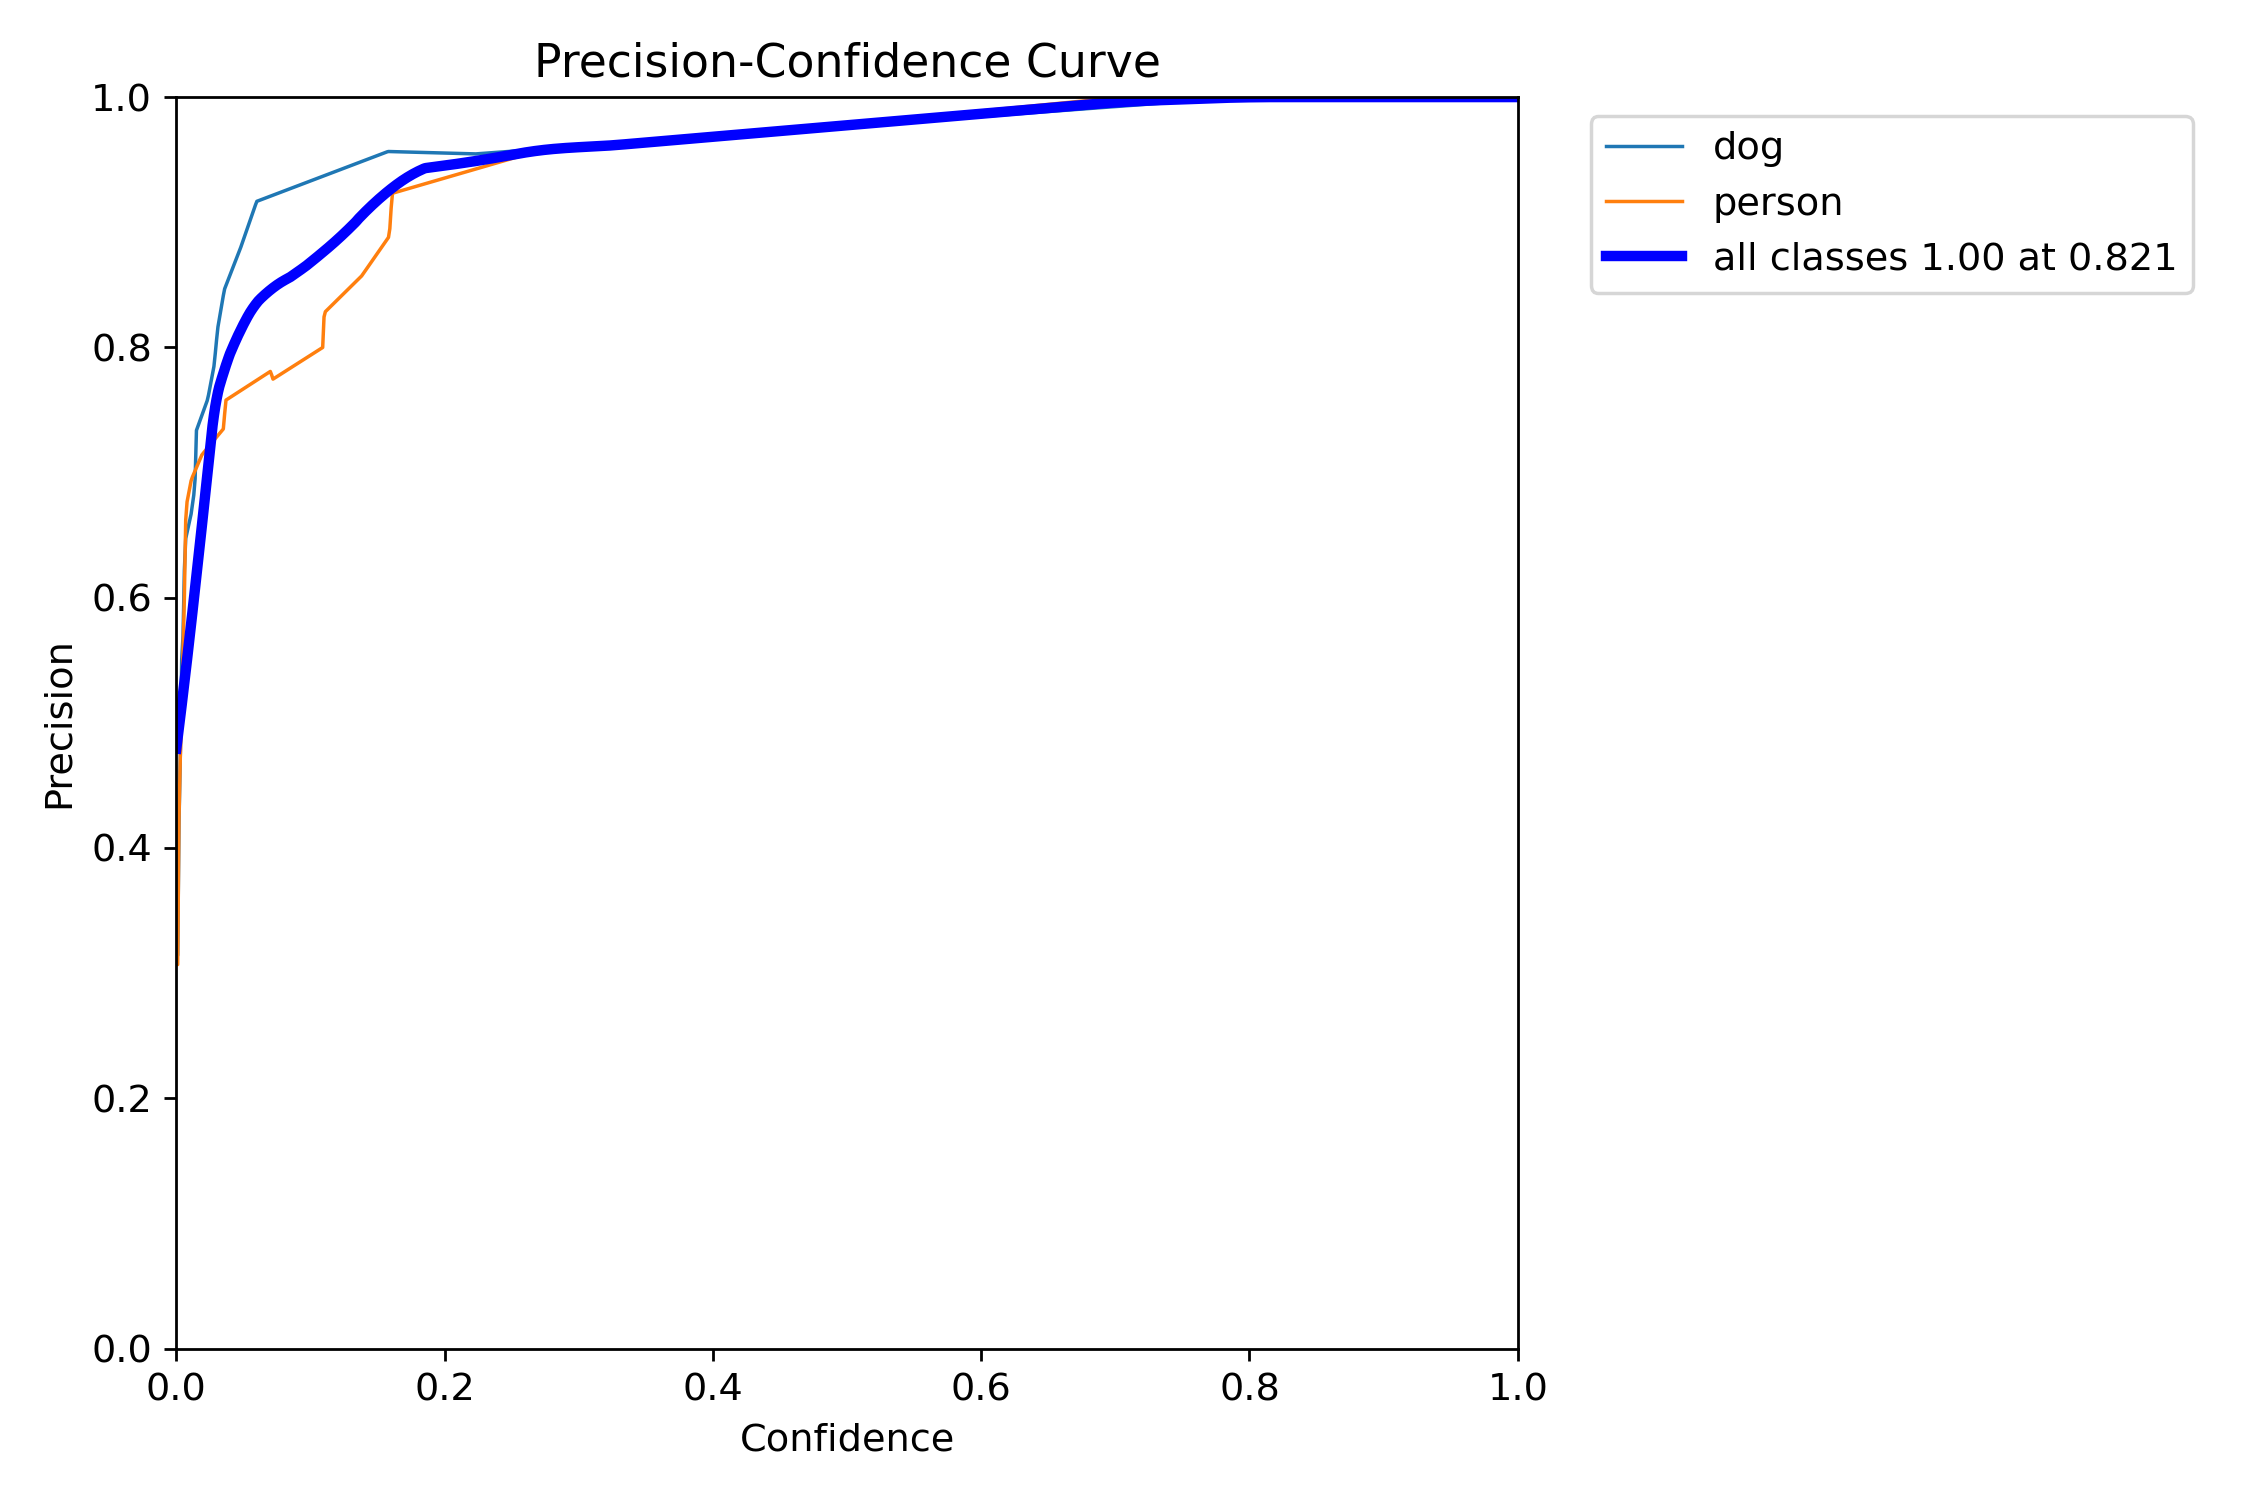

In [34]:
Image(filename='runs/detect/train2/P_curve.png', width=600)

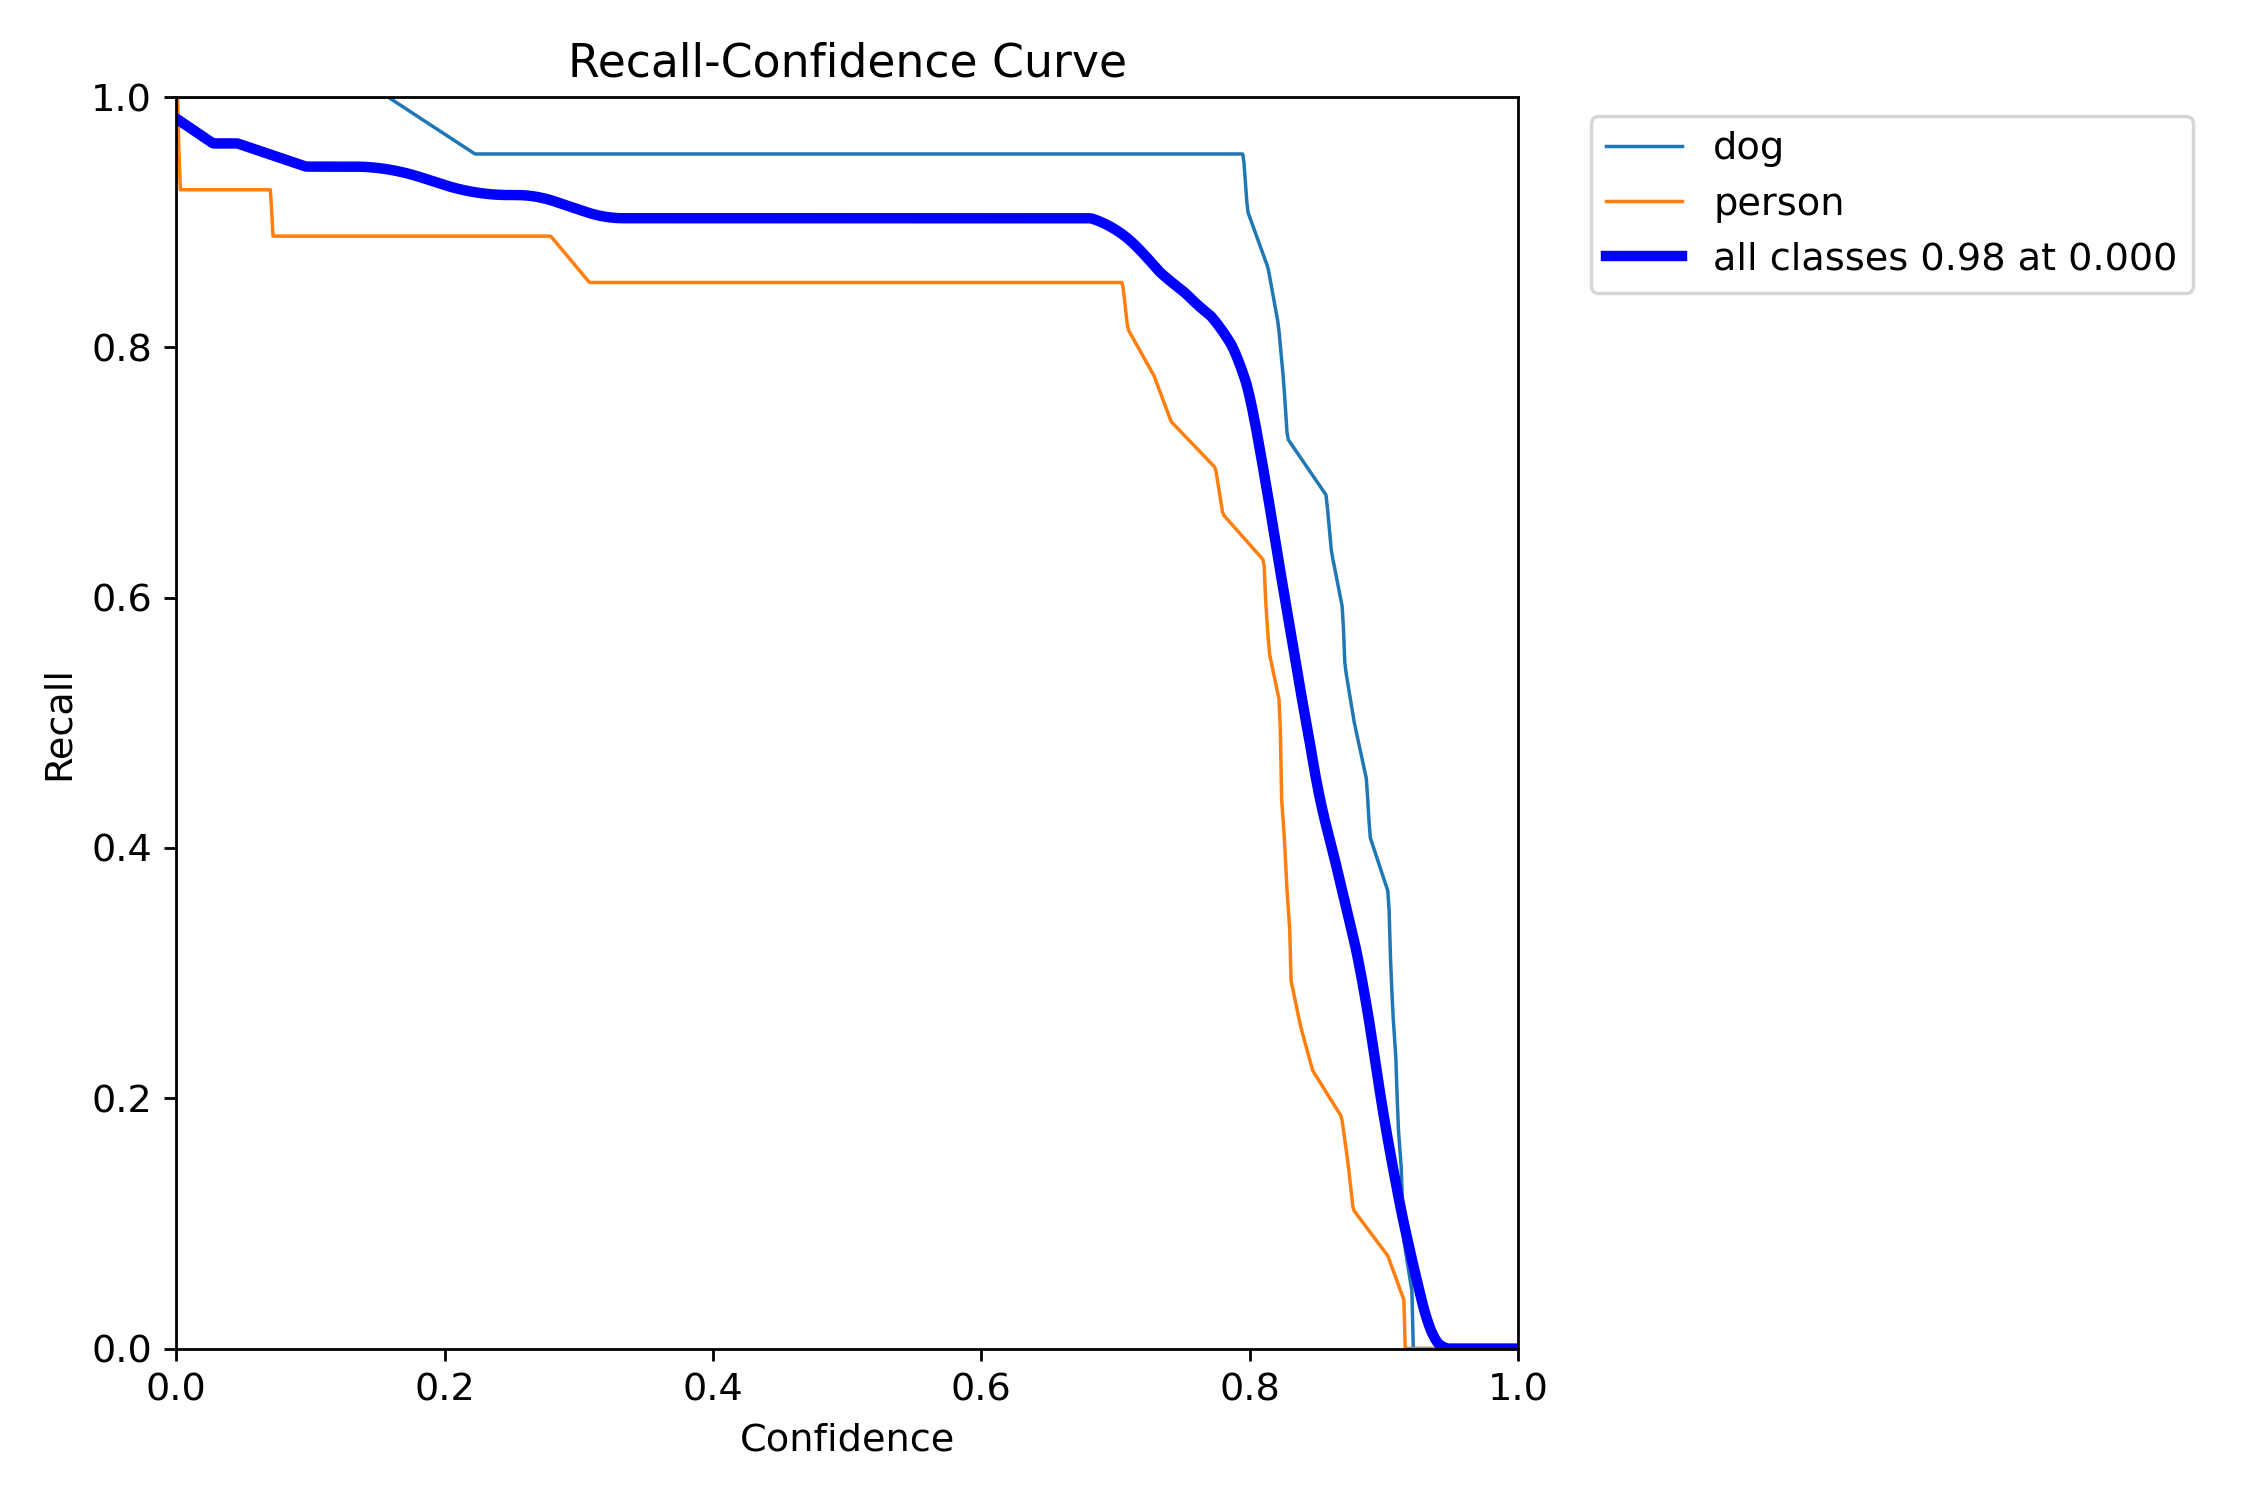

In [36]:
Image(filename='runs/detect/train2/R_curve.png', width=600)

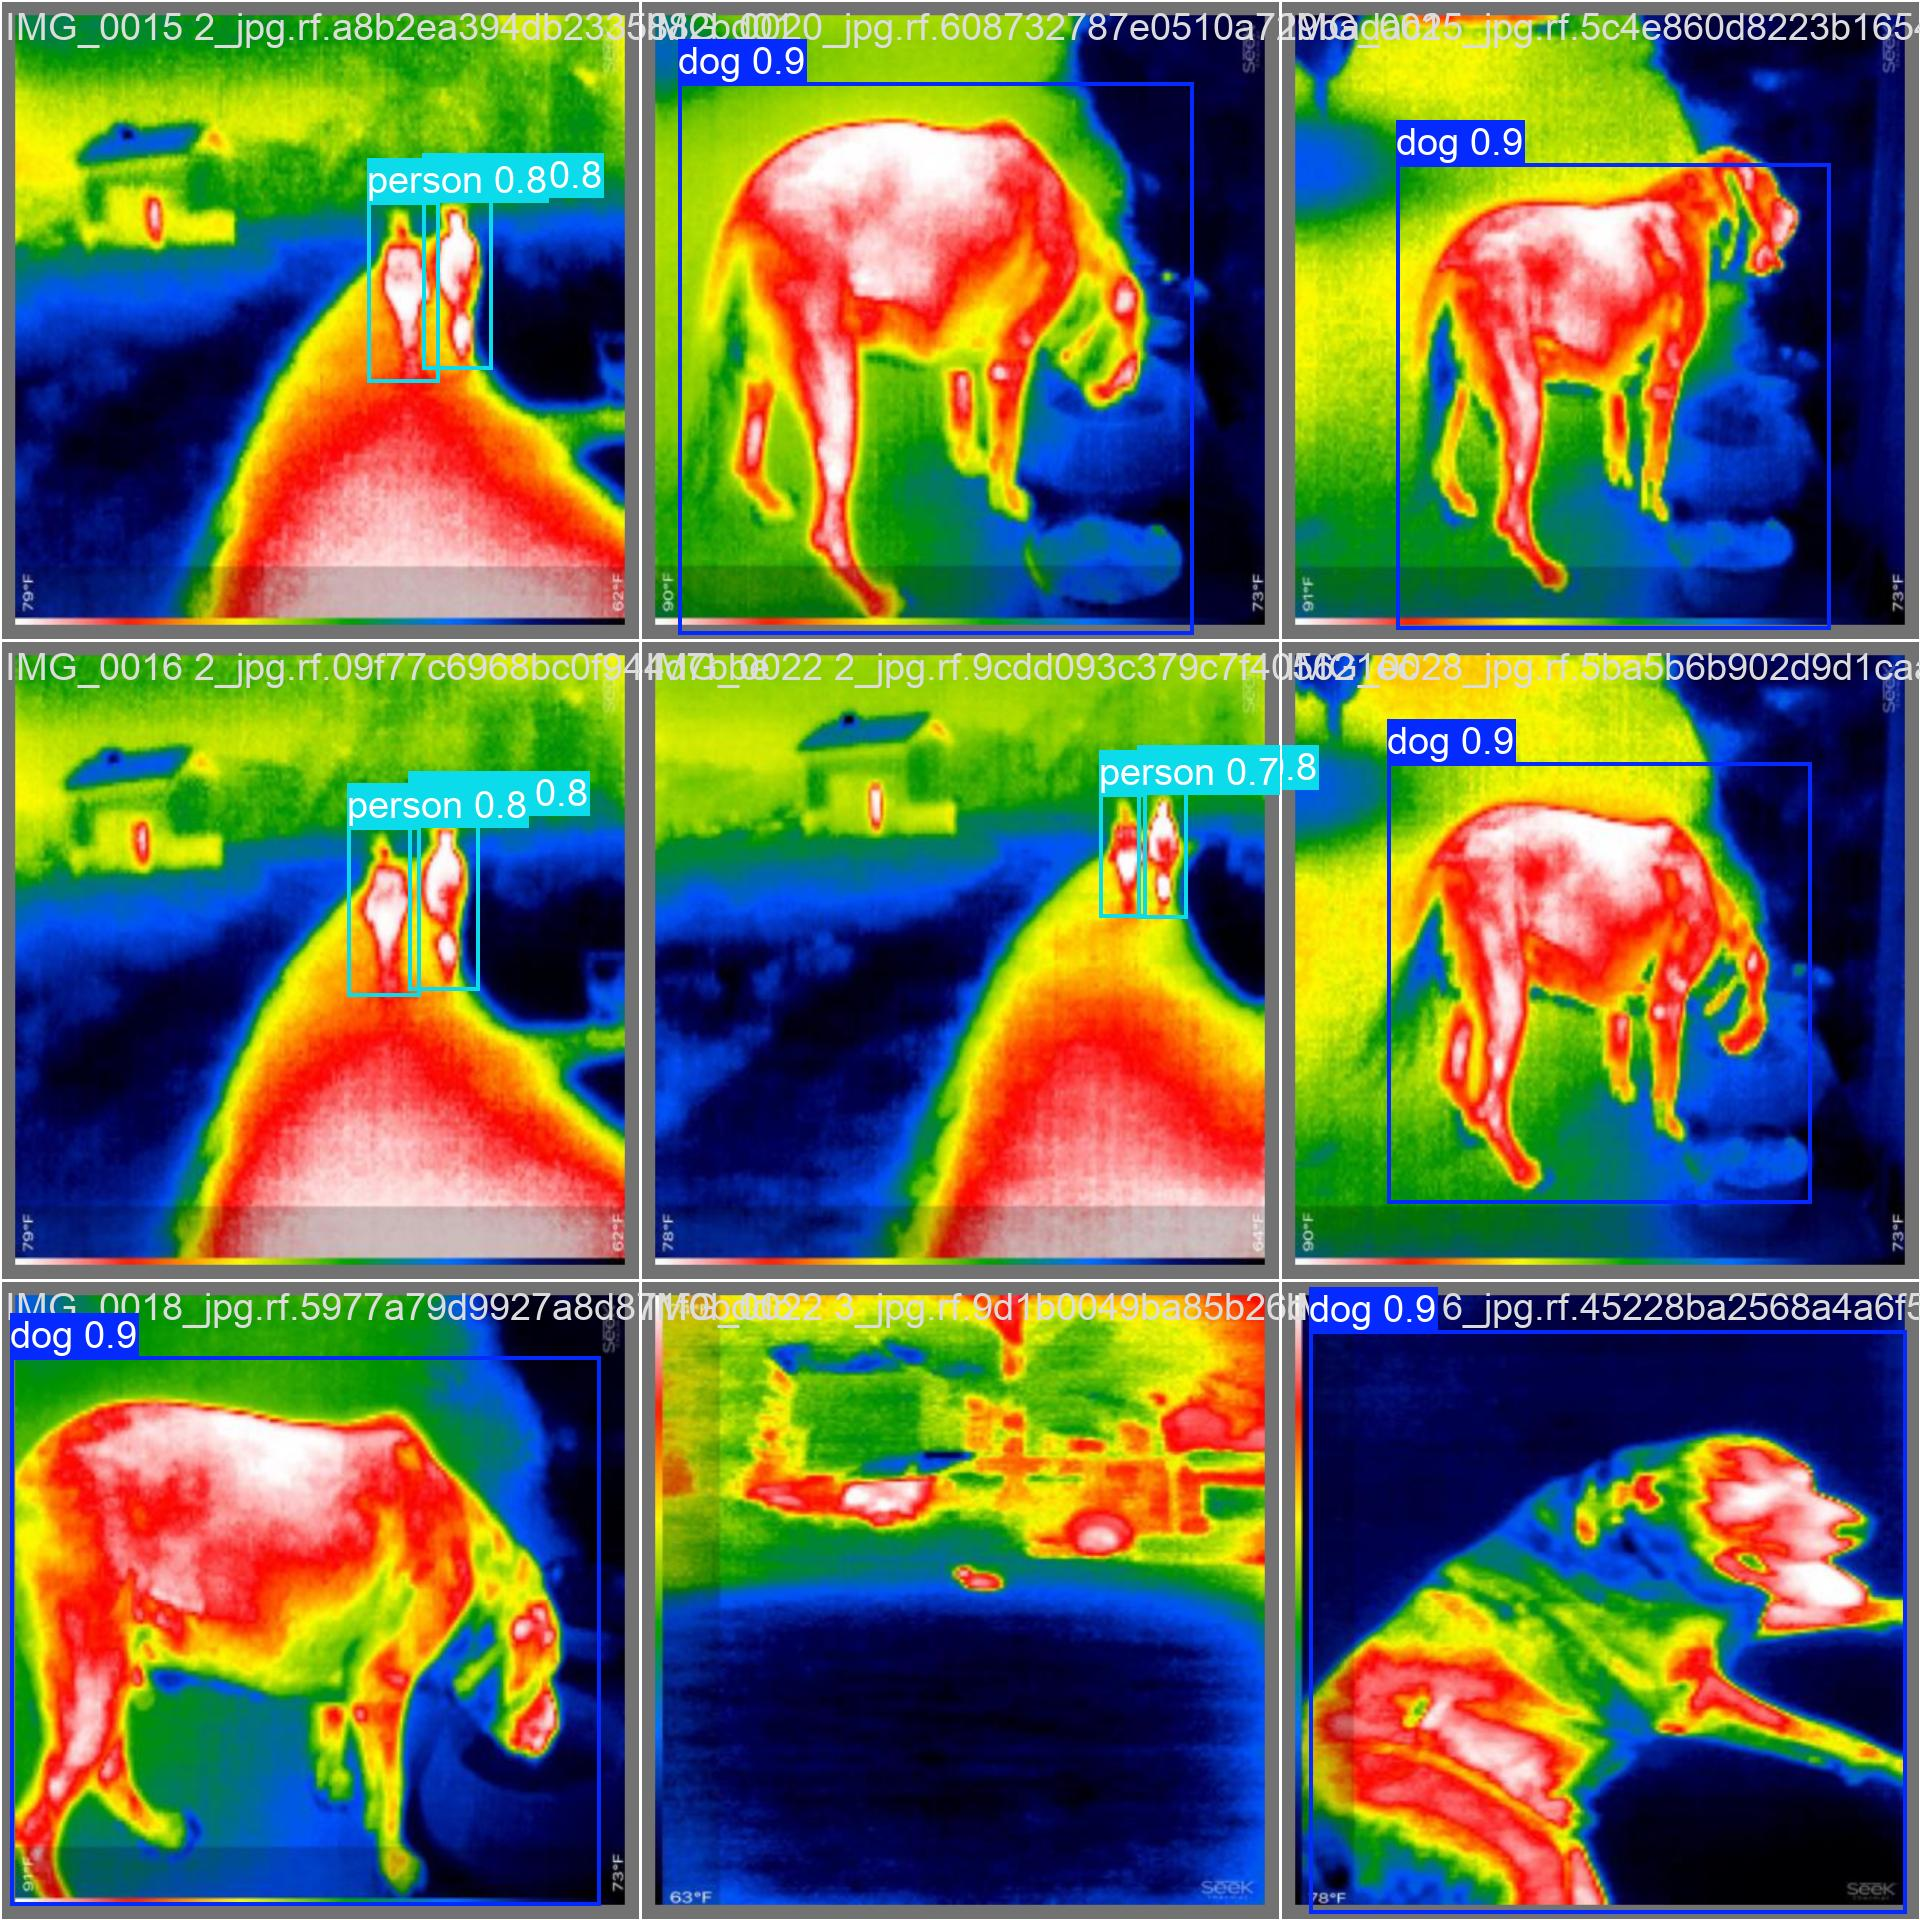

In [24]:
Image(filename='runs/detect/train2/val_batch1_pred.jpg', width=600)

In [25]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data="C:/Users/Faiz Hussain/Desktop/Thermal Dogs and People.v1-resize-416x416.yolov8/data.yaml"

Ultralytics YOLOv8.2.86 🚀 Python-3.12.0 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i9-11900H 2.50GHz)
YOLOv8n summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
                   all         41         49      0.834       0.59      0.735      0.281
                   dog         22         22      0.795      0.773      0.799      0.331
                person         19         27      0.873      0.407      0.671      0.232
Speed: 1.9ms preprocess, 93.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\val
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\valid\labels.cache... 41 images, 5 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]
val: Scanning C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\valid\labels.cache... 41 images, 5 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:01<00:03,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:03<00:01,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50 

In [26]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=test/images

Ultralytics YOLOv8.2.86 🚀 Python-3.12.0 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i9-11900H 2.50GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/20 c:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\test\images\IMG_0002 4_jpg.rf.6d1c60bf9f8779f13291c0547ea1ff70.jpg: 640x640 2 persons, 249.6ms
image 2/20 c:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\test\images\IMG_0006 5_jpg.rf.cd46e6a862d6ffb7fce6795067ce7cc7.jpg: 640x640 1 dog, 1 person, 204.7ms
image 3/20 c:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\test\images\IMG_0009_jpg.rf.ecdb212f7d7796e682a87e2e1d6e907e.jpg: 640x640 1 dog, 189.9ms
image 4/20 c:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\test\images\IMG_0012 2_jpg.rf.4c8e033ea0189ebd28c4e3751edd7a6a.jpg: 640x640 2 persons, 197.0ms
image 5/20 c:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resi

In [27]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict4/*.jpg')[:]:
      display(Image(filename=image_path, width=600))
      print("\n")

**RESULT**
 


0: 640x640 1 dog, 1 person, 232.1ms
Speed: 6.0ms preprocess, 232.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


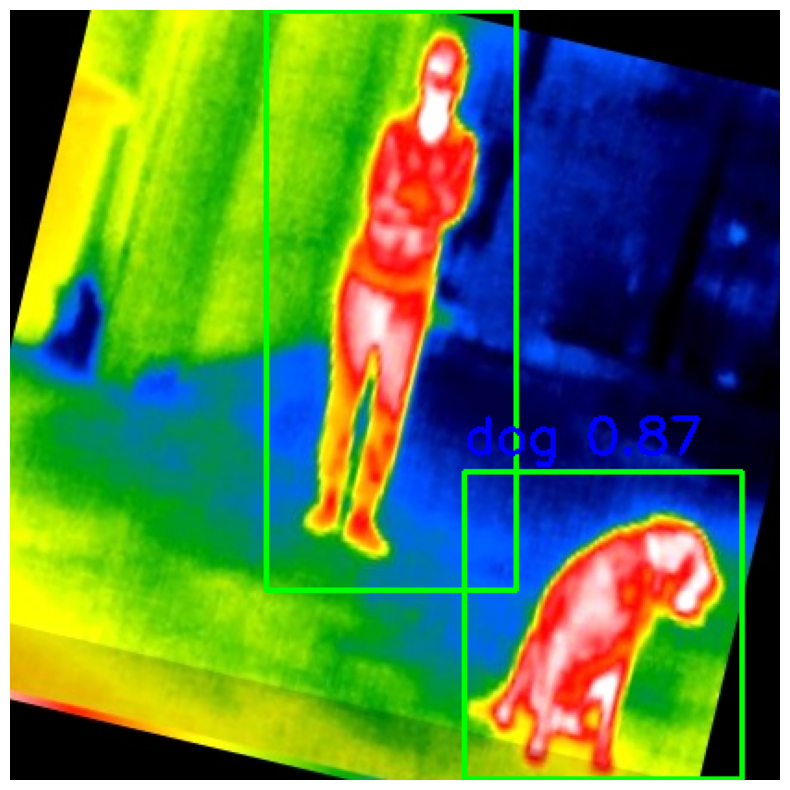

In [29]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# Load the trained model
model = YOLO('runs/detect/train2/weights/best.pt')  # Update with your model path

# Input an image for detection
image_path = r'C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\augumented\images\IMG_0104_jpg.rf.b5469c530e0c52eaa12c031fe354aaec_aug_3.jpg'  # Update with the path to your input image
image = cv2.imread(image_path)

# Perform object detection
results = model.predict(source=image, save=False)  # save=False to prevent saving automatically

# Get the detection results
detections = results[0]

# Loop through detected objects and draw bounding boxes with labels
for detection in detections.boxes:
    # Get bounding box coordinates
    x1, y1, x2, y2 = map(int, detection.xyxy[0])  # Bounding box (x1, y1, x2, y2)
    
    # Get the confidence score and the class name
    confidence = detection.conf[0]
    class_id = int(detection.cls[0])
    class_name = model.names[class_id]  # Get class name using the model's label mapping
    
    # Draw a rectangle (bounding box)
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Put the label with the confidence score
    label = f"{class_name} {confidence:.2f}"
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Convert the image from BGR to RGB for displaying
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes and labels
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()



0: 640x640 1 dog, 309.4ms
Speed: 19.7ms preprocess, 309.4ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)


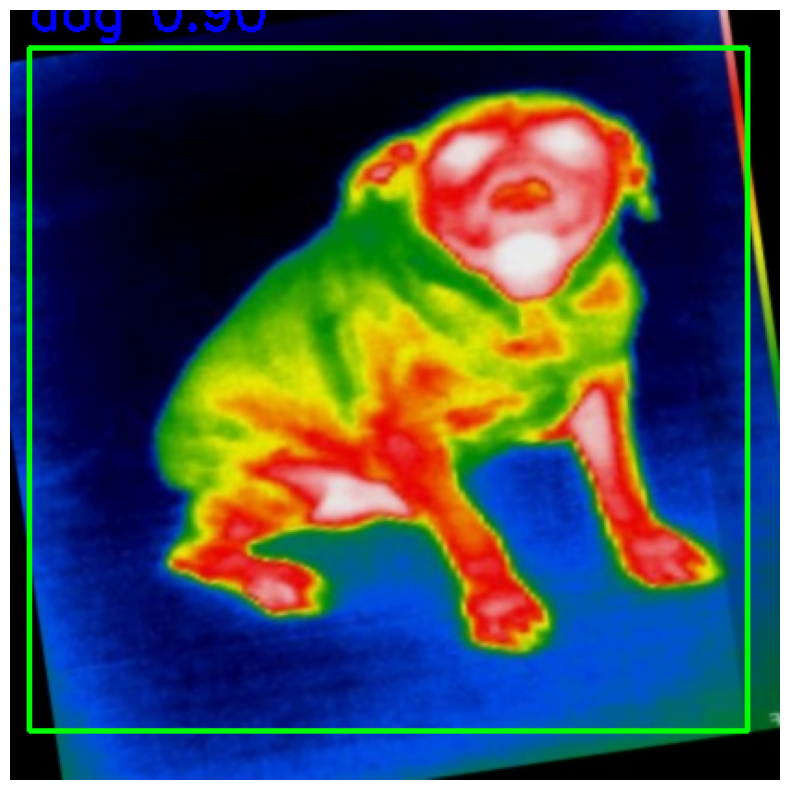

In [ ]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# Load the trained model
model = YOLO('runs/detect/train2/weights/best.pt')  # Update with your model path

# Input an image for detection
image_path = r'C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\augumented\images\IMG_0004 2_jpg.rf.70393df2ea42aae5b9f7ce486efd7048_aug_3.jpg'  # Update with the path to your input image
image = cv2.imread(image_path)
C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\augumented\images\IMG_0061_jpg.rf.43a863f68c59d7d782c00398e3361e59_aug_0.jpg
# Perform object detection
results = model.predict(source=image, save=False)  # save=False to prevent saving automatically

# Get the detection results
detections = results[0]

# Loop through detected objects and draw bounding boxes with labels
for detection in detections.boxes:
    # Get bounding box coordinates
    x1, y1, x2, y2 = map(int, detection.xyxy[0])  # Bounding box (x1, y1, x2, y2)
    
    # Get the confidence score and the class name
    confidence = detection.conf[0]
    class_id = int(detection.cls[0])
    class_name = model.names[class_id]  # Get class name using the model's label mapping
    
    # Draw a rectangle (bounding box)
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Put the label with the confidence score
    label = f"{class_name} {confidence:.2f}"
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Convert the image from BGR to RGB for displaying
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes and labels
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()



0: 640x640 1 dog, 309.4ms
Speed: 19.7ms preprocess, 309.4ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)


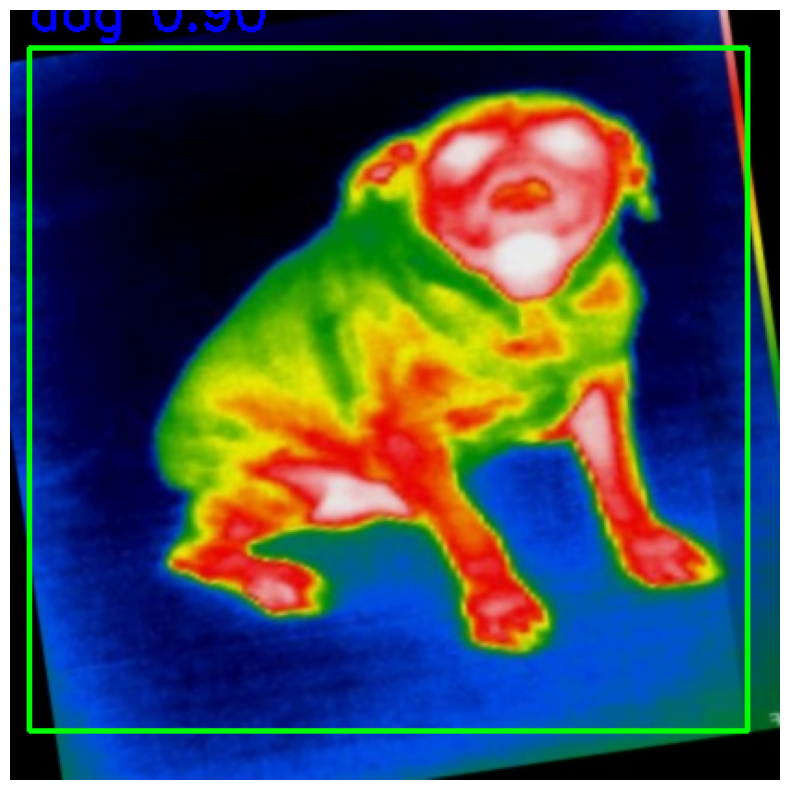

In [ ]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# Load the trained model
model = YOLO('runs/detect/train2/weights/best.pt')  # Update with your model path

# Input an image for detection
image_path = r'C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\augumented\images\IMG_0004 2_jpg.rf.70393df2ea42aae5b9f7ce486efd7048_aug_3.jpg'  # Update with the path to your input image
image = cv2.imread(image_path)

# Perform object detection
results = model.predict(source=image, save=False)  # save=False to prevent saving automatically

# Get the detection results
detections = results[0]

# Loop through detected objects and draw bounding boxes with labels
for detection in detections.boxes:
    # Get bounding box coordinates
    x1, y1, x2, y2 = map(int, detection.xyxy[0])  # Bounding box (x1, y1, x2, y2)
    
    # Get the confidence score and the class name
    confidence = detection.conf[0]
    class_id = int(detection.cls[0])
    class_name = model.names[class_id]  # Get class name using the model's label mapping
    
    # Draw a rectangle (bounding box)
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Put the label with the confidence score
    label = f"{class_name} {confidence:.2f}"
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Convert the image from BGR to RGB for displaying
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes and labels
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()



0: 640x640 1 dog, 1 person, 225.1ms
Speed: 7.0ms preprocess, 225.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


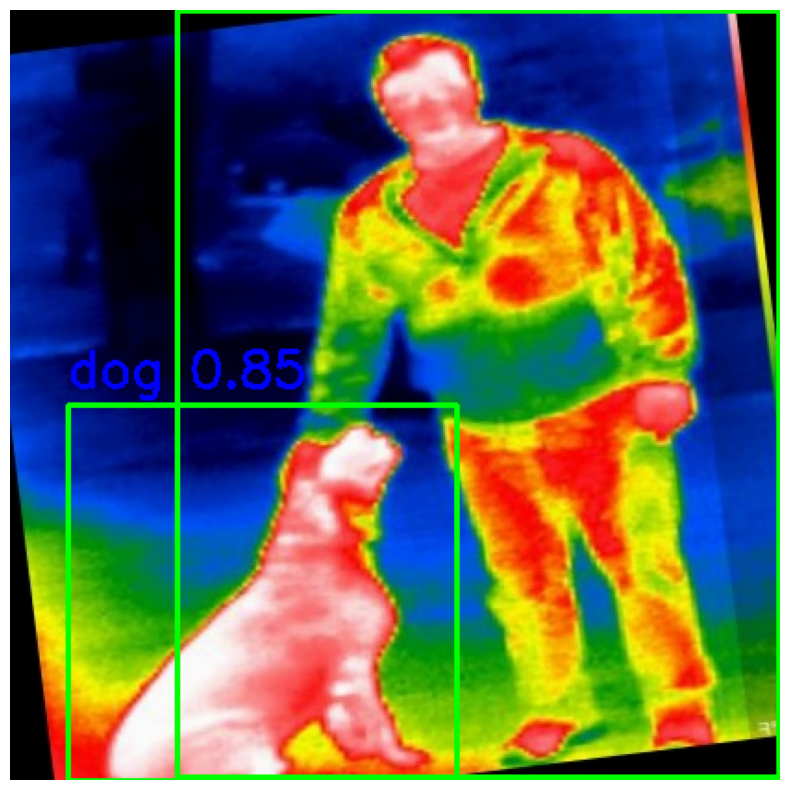

In [37]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# Load the trained model
model = YOLO('runs/detect/train2/weights/best.pt')  # Update with your model path

# Input an image for detection
image_path = r'C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\augumented\images\IMG_0061_jpg.rf.43a863f68c59d7d782c00398e3361e59_aug_0.jpg'  # Update with the path to your input image
image = cv2.imread(image_path)

# Perform object detection
results = model.predict(source=image, save=False)  # save=False to prevent saving automatically

# Get the detection results
detections = results[0]

# Loop through detected objects and draw bounding boxes with labels
for detection in detections.boxes:
    # Get bounding box coordinates
    x1, y1, x2, y2 = map(int, detection.xyxy[0])  # Bounding box (x1, y1, x2, y2)
    
    # Get the confidence score and the class name
    confidence = detection.conf[0]
    class_id = int(detection.cls[0])
    class_name = model.names[class_id]  # Get class name using the model's label mapping
    
    # Draw a rectangle (bounding box)
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Put the label with the confidence score
    label = f"{class_name} {confidence:.2f}"
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Convert the image from BGR to RGB for displaying
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes and labels
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()



0: 640x640 1 dog, 309.4ms
Speed: 19.7ms preprocess, 309.4ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)


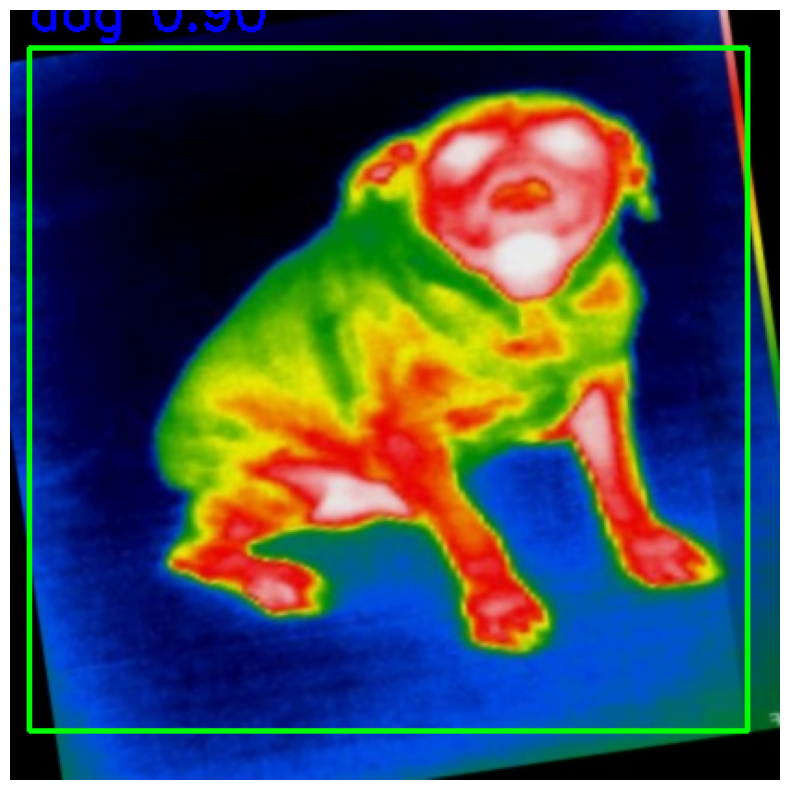

In [ ]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# Load the trained model
model = YOLO('runs/detect/train2/weights/best.pt')  # Update with your model path

# Input an image for detection
image_path = r'C:\Users\Faiz Hussain\Desktop\Thermal Dogs and People.v1-resize-416x416.yolov8\augumented\images\IMG_0004 2_jpg.rf.70393df2ea42aae5b9f7ce486efd7048_aug_3.jpg'  # Update with the path to your input image
image = cv2.imread(image_path)

# Perform object detection
results = model.predict(source=image, save=False)  # save=False to prevent saving automatically

# Get the detection results
detections = results[0]

# Loop through detected objects and draw bounding boxes with labels
for detection in detections.boxes:
    # Get bounding box coordinate
    x1, y1, x2, y2 = map(int, detection.xyxy[0])  # Bounding box (x1, y1, x2, y2)
    
    # Get the confidence score and the class name
    confidence = detection.conf[0]
    class_id = int(detection.cls[0])
    class_name = model.names[class_id]  # Get class name using the model's label mapping
    
    # Draw a rectangle (bounding box)
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Put the label with the confidence score
    label = f"{class_name} {confidence:.2f}"
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Convert the image from BGR to RGB for displaying
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes and labels
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
